### Overview:

This project aims to predict the energy consumption of appliances by analyzing environmental and indoor factors. The task involves developing a machine learning model that leverages variables such as temperature, humidity, and weather conditions to forecast energy usage using a supervised regression approach.

### Objective:

To predict the energy consumption of appliances by analyzing factors such as temperature, humidity, and weather conditions.

### Data Description:


### Source:
Data Set Link : https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

The dataset appears to be related to energy consumption and environmental conditions, commonly used in research and modeling tasks.

### Features:

**Numerical Features:**

**T1, T2, T3, T4, T5, T6, T7, T8, T9:** Temperature readings at different time points or locations.

**RH_1, RH_2, RH_3, etc.:** Relative humidity readings at different times or locations.

**Appliances:** Power consumption by appliances (target variable).

**lights:** Power consumption by lights.

**T_out:** External temperature.

**Press_mm_hg:** Atmospheric pressure.

**Windspeed:** Wind speed.

**Visibility:** Visibility in the area.

**Tdewpoint:** Dew point.

**rv1, rv2:** Random variables used for noise in data collection.

**Categorical Features:**

**date:** Timestamps for when each measurement was recorded.

### Target Variable:
#### Appliances
This column represents the energy consumption of appliances (in Wh) (Appliances), which is the value the project aims to predict.

### Data Collection:

In [1]:
# Import Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [2]:
# Load Data as DataFrame

df= pd.read_csv("energydata_complete.csv")

DataFrame: DataFrame is a data structure commonly used for handling and analyzing structured data. A DataFrame is conceptually 
similar to a table in a relational database or an Excel spreadsheet, where data is organized into rows and columns.

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [5]:
df.shape

(19735, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Data Preprocessing - Data Cleaning:

Data Preprocessing: Data Preprocessing involves preparing raw data for modeling. It ensures that the data is clean, consistent, 
and suitable for the algorithm to learn effectively. 

In [9]:
# Convert 'Date' column to datetime format

df['date'] = pd.to_datetime(df['date']) 

# Extract year, month, day, and day of the week

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day_of_Week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['Hour'] = df['date'].dt.hour

In [10]:
print(df[['date','Year','Month','Day','Day_of_Week']])

                     date  Year  Month  Day  Day_of_Week
0     2016-01-11 17:00:00  2016      1   11            0
1     2016-01-11 17:10:00  2016      1   11            0
2     2016-01-11 17:20:00  2016      1   11            0
3     2016-01-11 17:30:00  2016      1   11            0
4     2016-01-11 17:40:00  2016      1   11            0
...                   ...   ...    ...  ...          ...
19730 2016-05-27 17:20:00  2016      5   27            4
19731 2016-05-27 17:30:00  2016      5   27            4
19732 2016-05-27 17:40:00  2016      5   27            4
19733 2016-05-27 17:50:00  2016      5   27            4
19734 2016-05-27 18:00:00  2016      5   27            4

[19735 rows x 5 columns]


In [11]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Year           0
Month          0
Day            0
Day_of_Week    0
Hour           0
dtype: int64

In [12]:
df.drop(columns=['date'], inplace=True)

In [13]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Year,Month,Day,Day_of_Week,Hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,0,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,0,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,0,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,0,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,0,17


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [ ]:
# There is no categorical columns, so no need to split into numerical and categorical columns to apply 'Encoding' techniques.

In [ ]:
# There is no NULL values or Duplicates in the data

#### Understanding Data Using Visualizations:

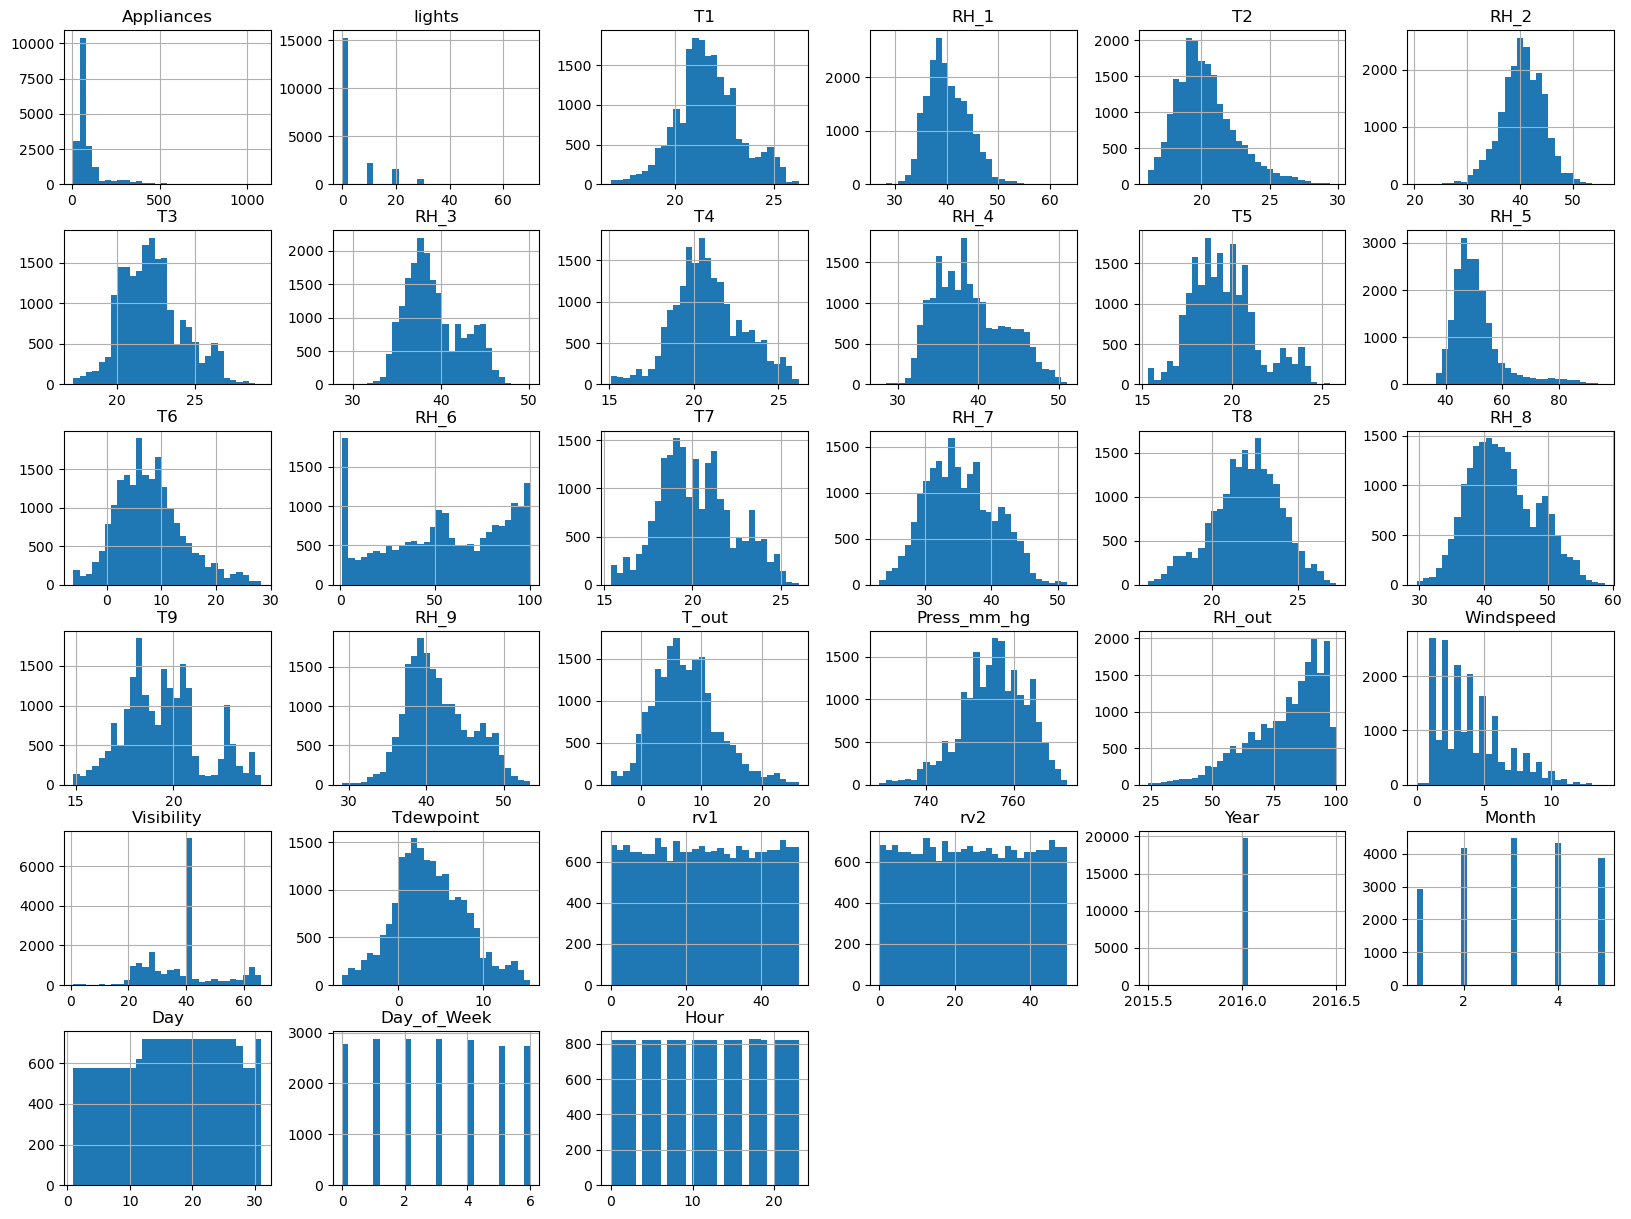

In [15]:
# Histogram for all numeric features

df.hist(bins=30, figsize=(20,15))
plt.title('Hisogram of numeric features')
plt.show()

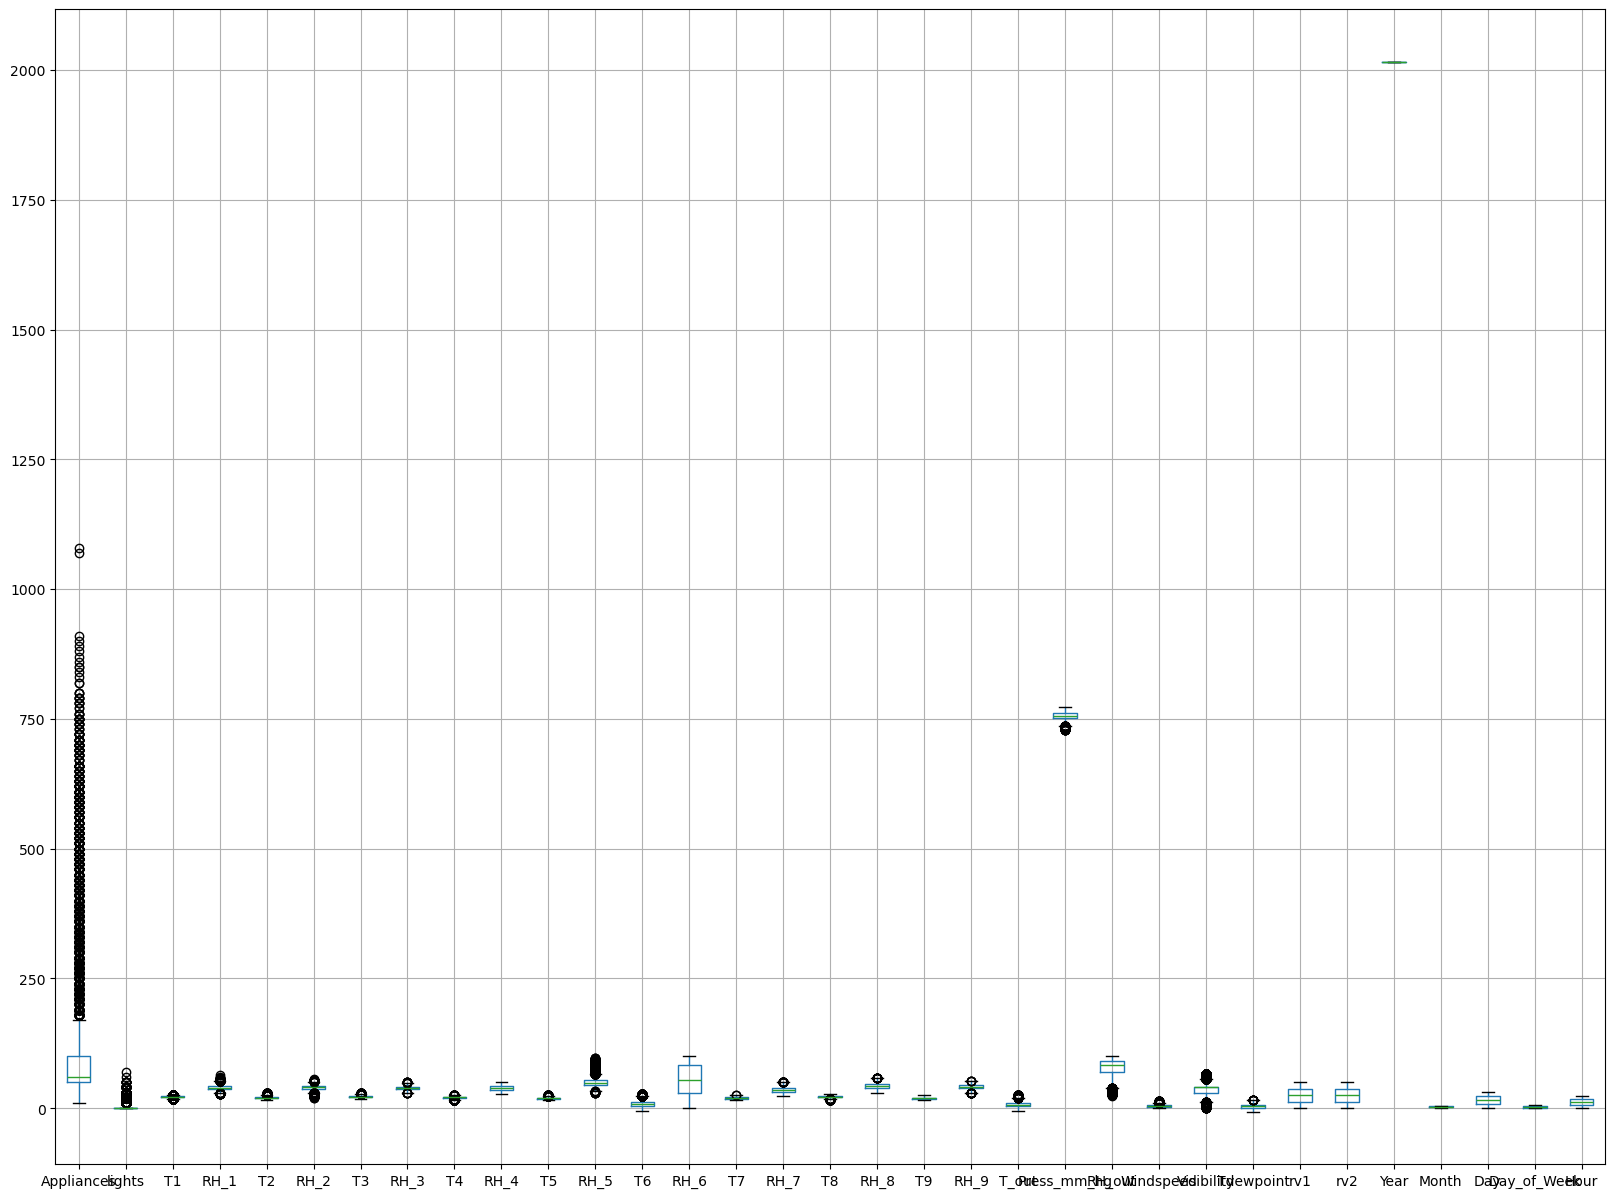

In [16]:
# Check outliers 

plt.figure(figsize=(20,15))
df.boxplot()
plt.show()

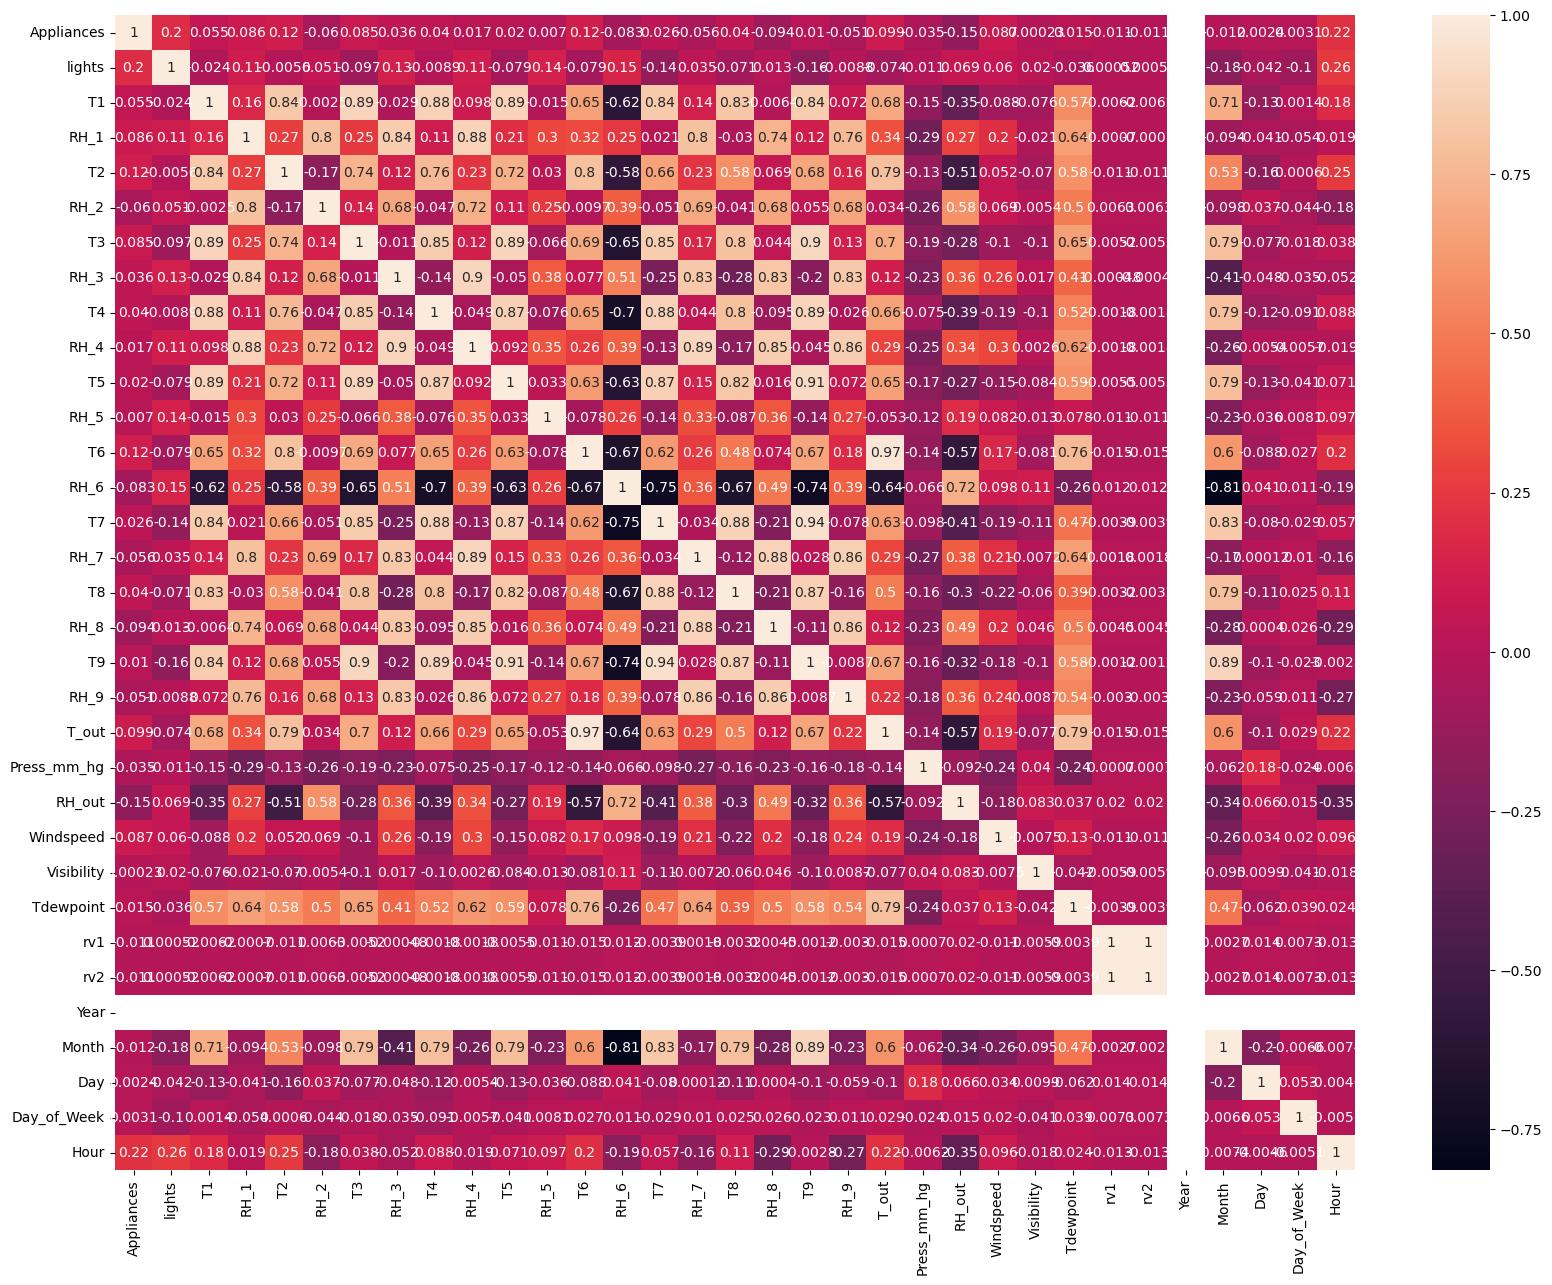

In [17]:
# Check correlation of features

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Handling Outliers:

Outliers: Outliers are data points that deviate significantly from the majority of the data. They can arise due to errors, variability, or rare events. Identifying and handling outliers is crucial because they can distort statistical summaries and negatively impact model performance.

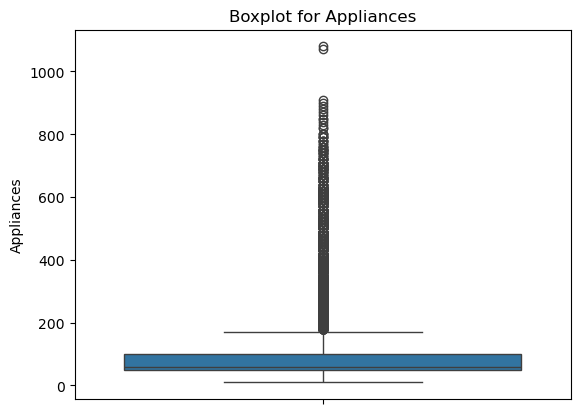

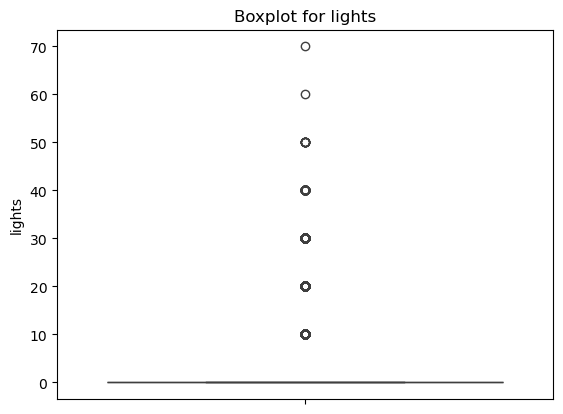

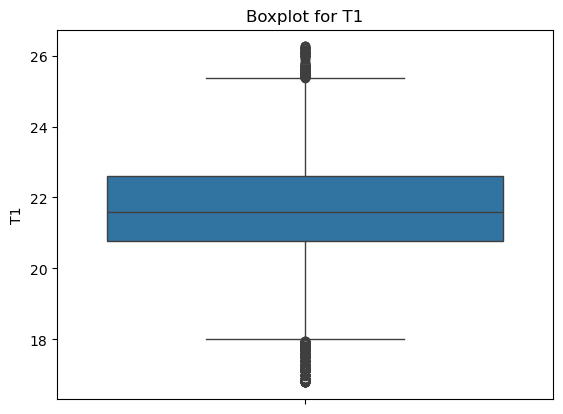

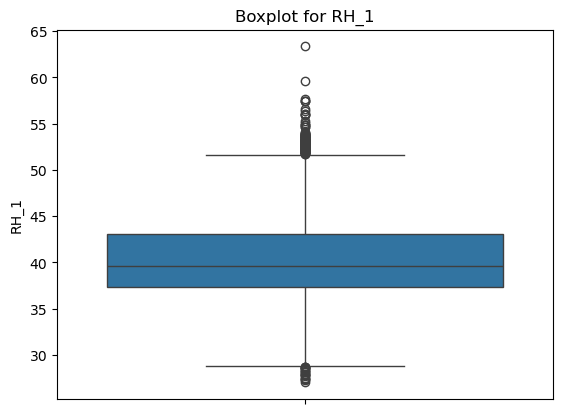

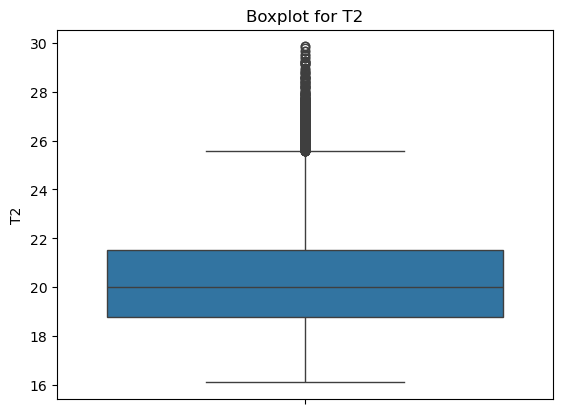

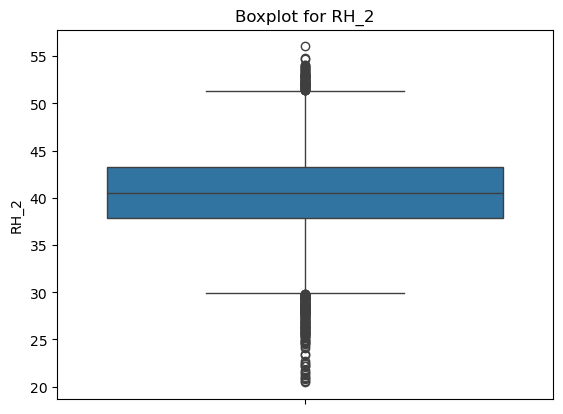

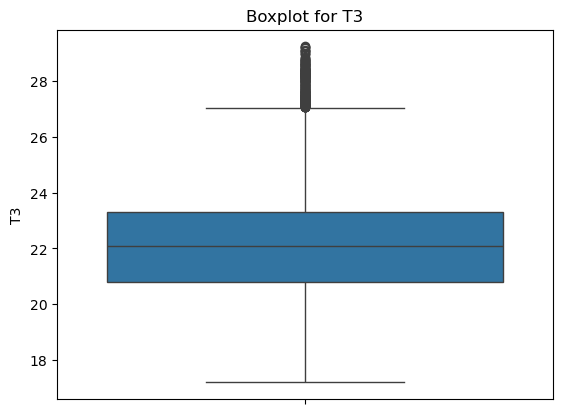

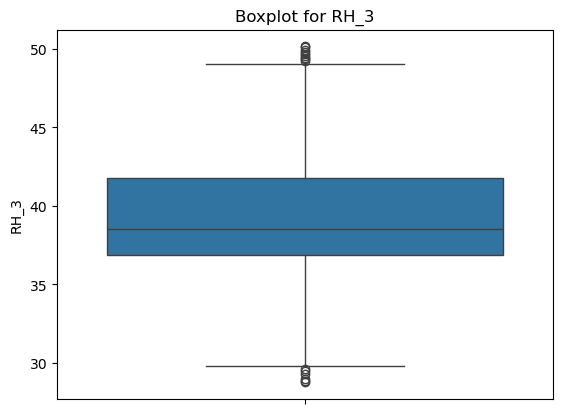

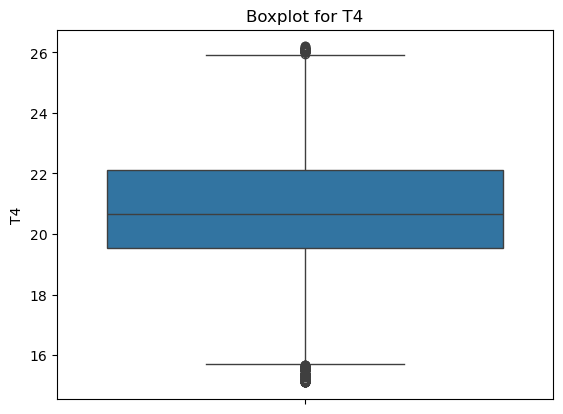

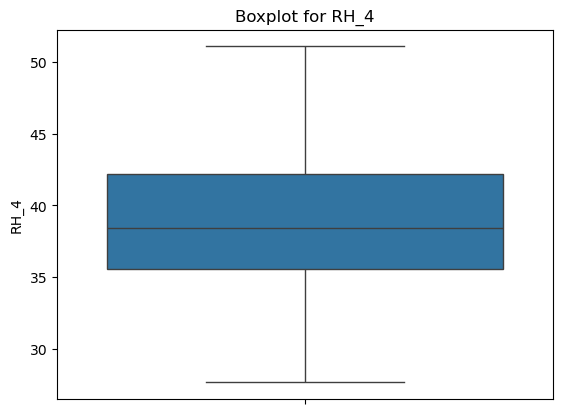

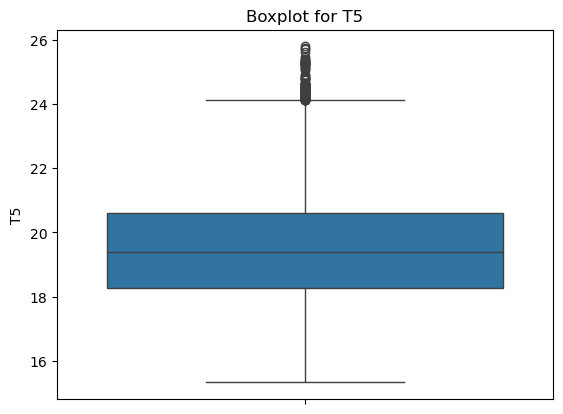

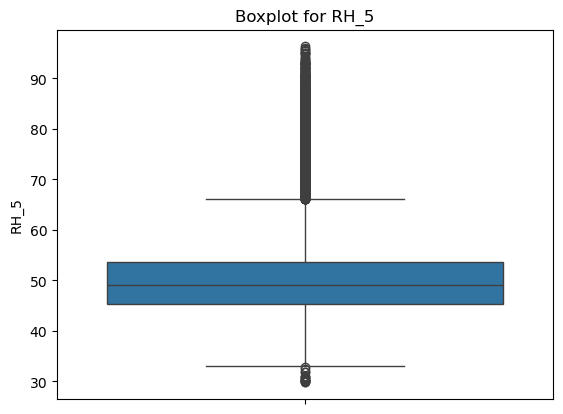

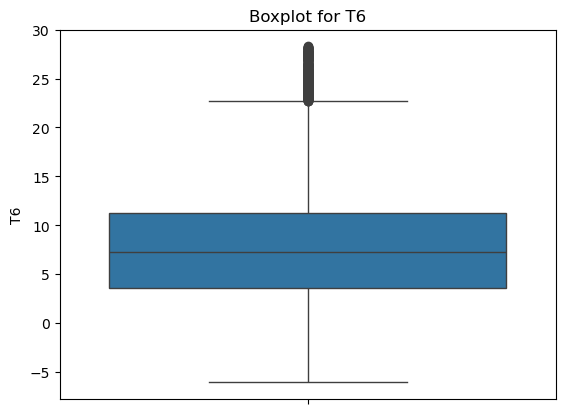

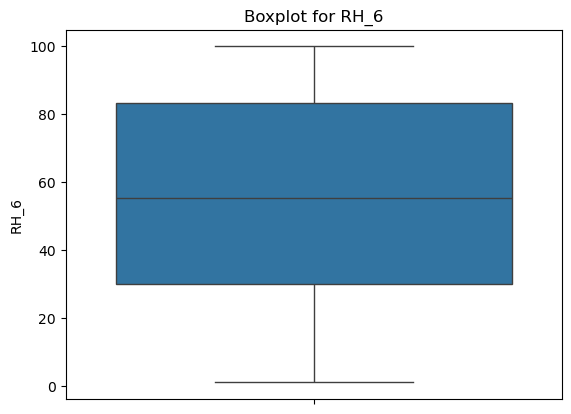

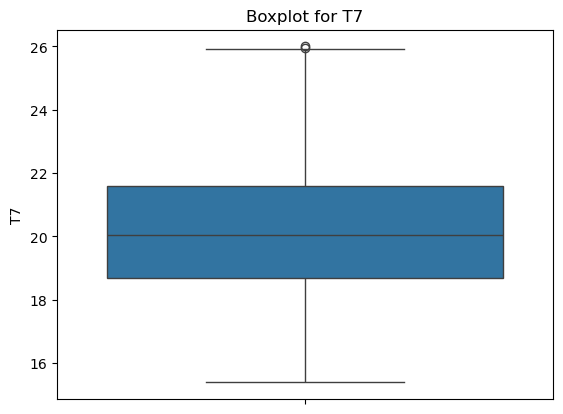

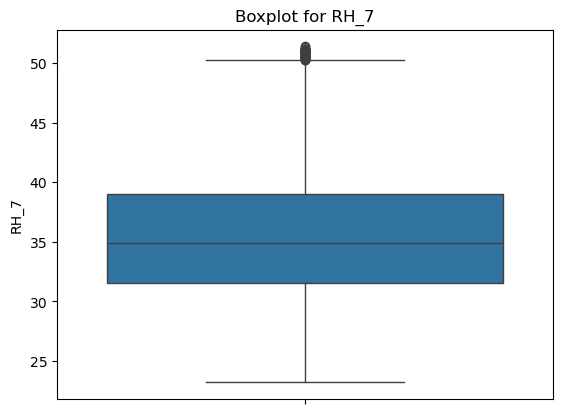

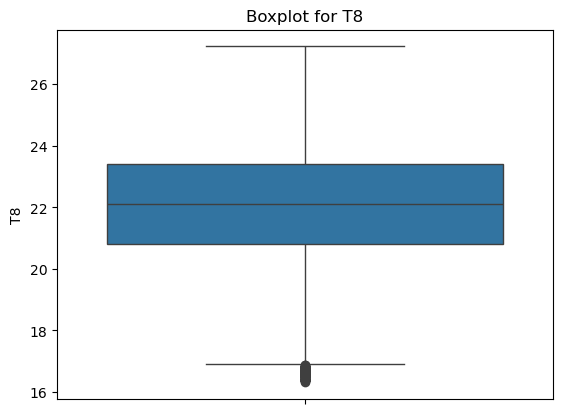

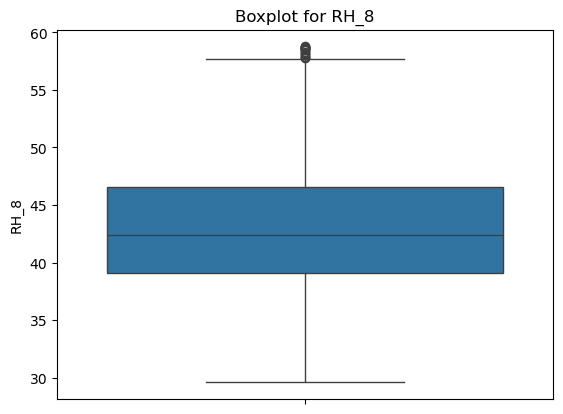

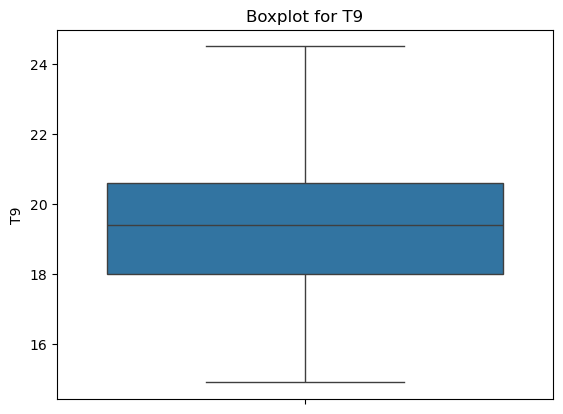

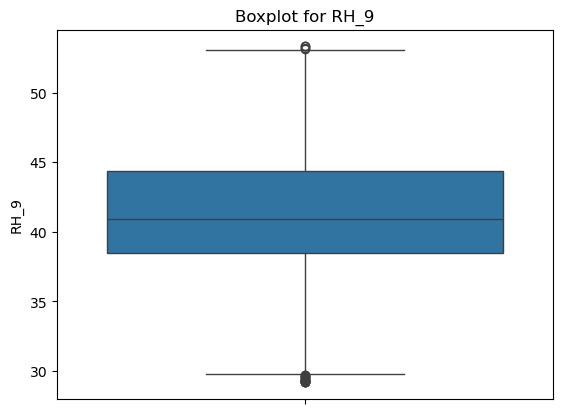

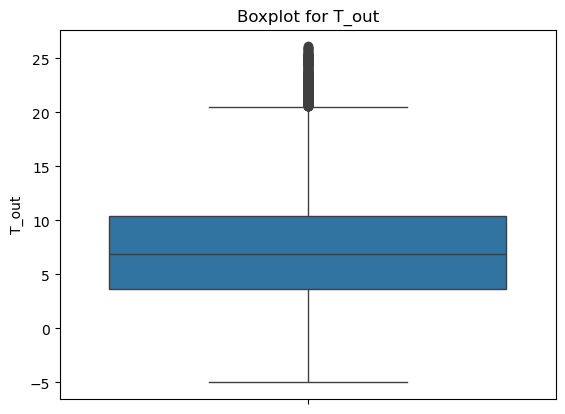

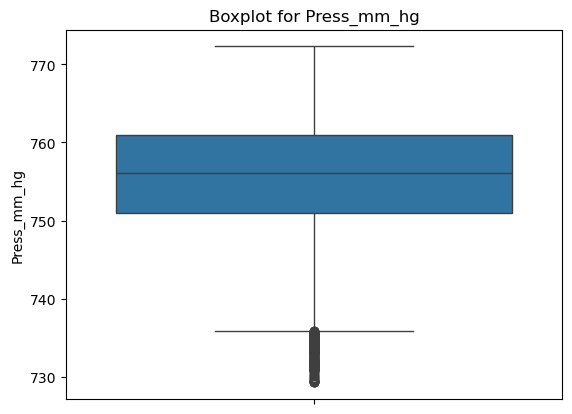

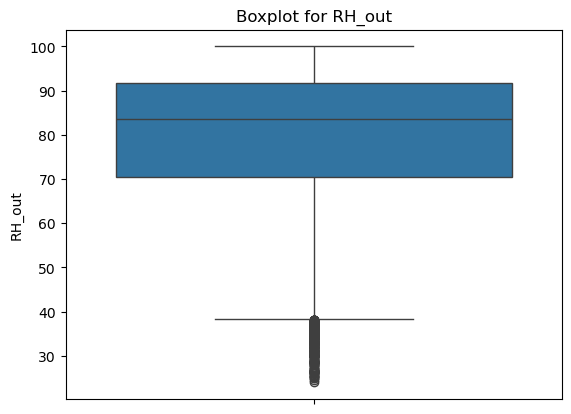

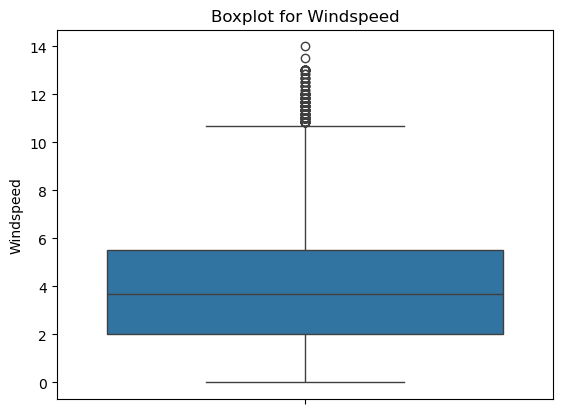

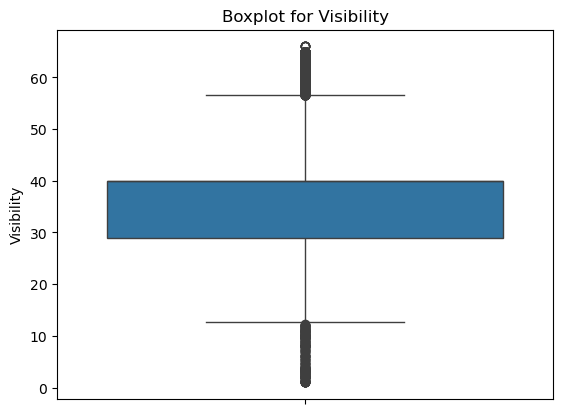

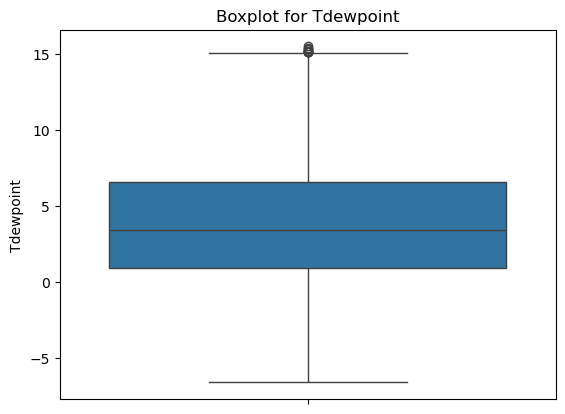

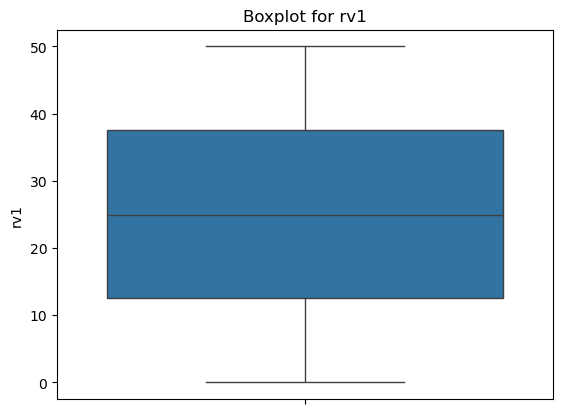

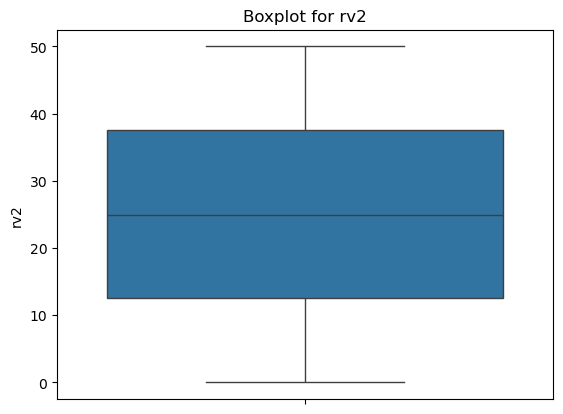

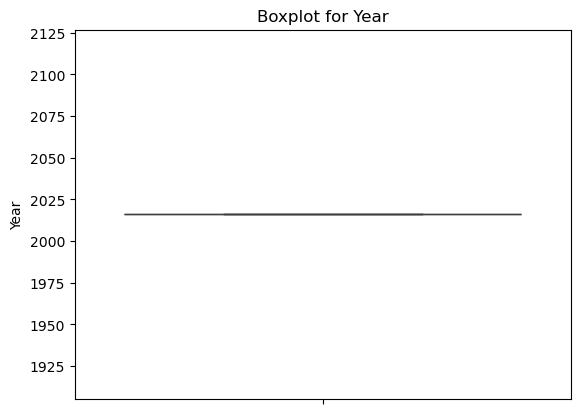

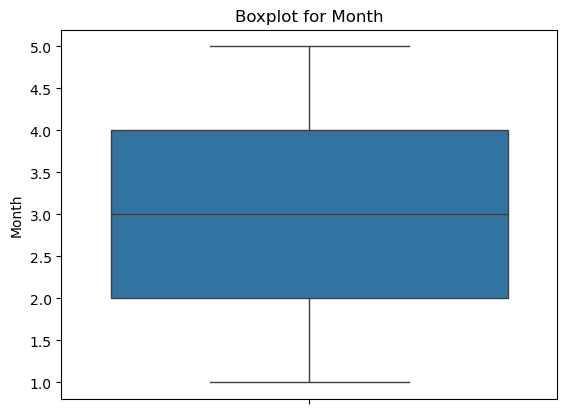

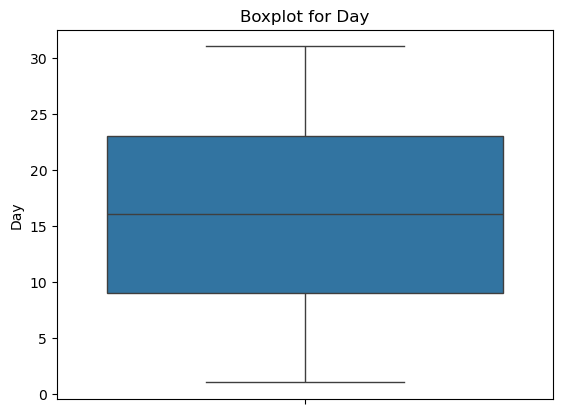

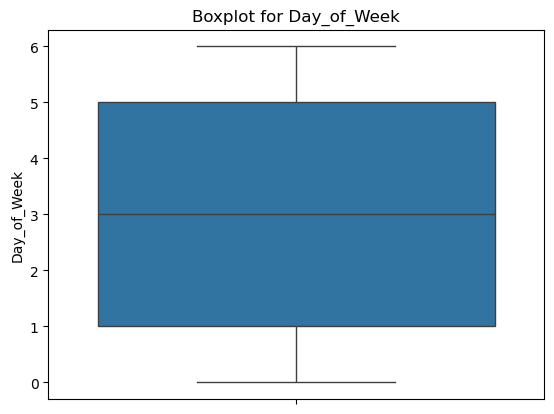

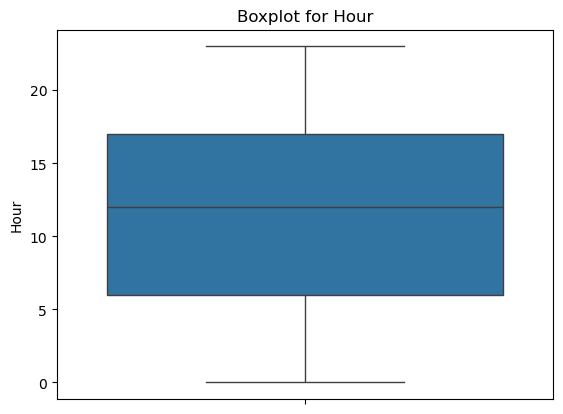

In [18]:
# Check for Outliers in each column using Boxplot

for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")

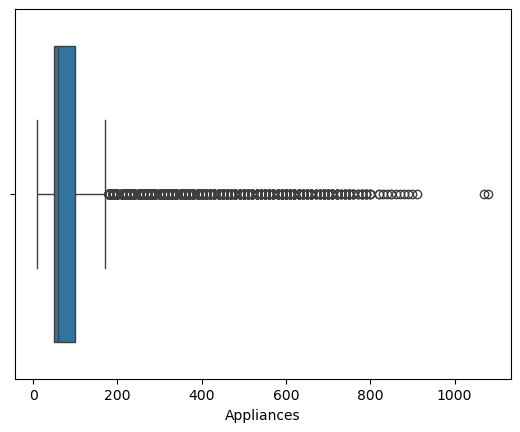

In [19]:
sns.boxplot(x=df['Appliances'])
plt.show()

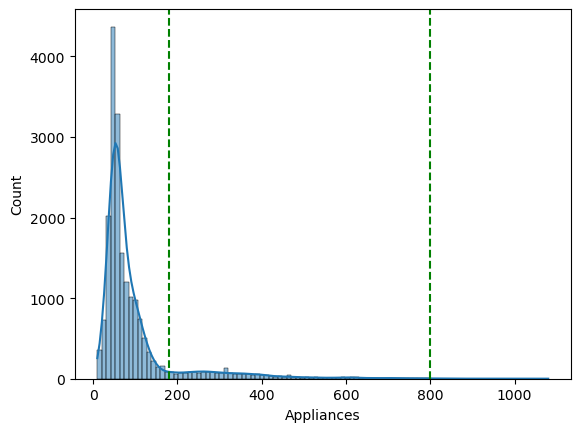

In [20]:
sns.histplot(df['Appliances'], bins=100, kde=True)
plt.axvline(180, color='green', linestyle='--')
plt.axvline(800, color='green', linestyle='--')
plt.show()

In [21]:
# Handling Outliers using IQR method
# Define function for handling outlier using IQR

def handle_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.20)
        Q3 = df[col].quantile(0.80)
        IQR = Q3 - Q1

        # Define lower and upper bounds

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        
        # Cap the outliers using capping (Winsorizing)
    
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        
        # Applies a function to each value (x) in the column col.
        # If x is less than lower, it replaces x with lower.
        # If x is greater than upper, it replaces x with upper.
        # Otherwise, it keeps x as is.
    
    return(df)

df = handle_outliers_iqr(df)
        

IQR: The Interquartile Range (IQR) method is a statistical technique used to identify outliers in a dataset. 
It is based on the spread of the middle 50% of the data, which is less sensitive to extreme values compared to 
measures like the mean and standard deviation.
Q1 (First Quartile): The median of the lower half of the dataset (25th percentile).
Q3 (Third Quartile): The median of the upper half of the dataset (75th percentile).
Any data point below the lower bound or above the upper bound is considered an outlier.

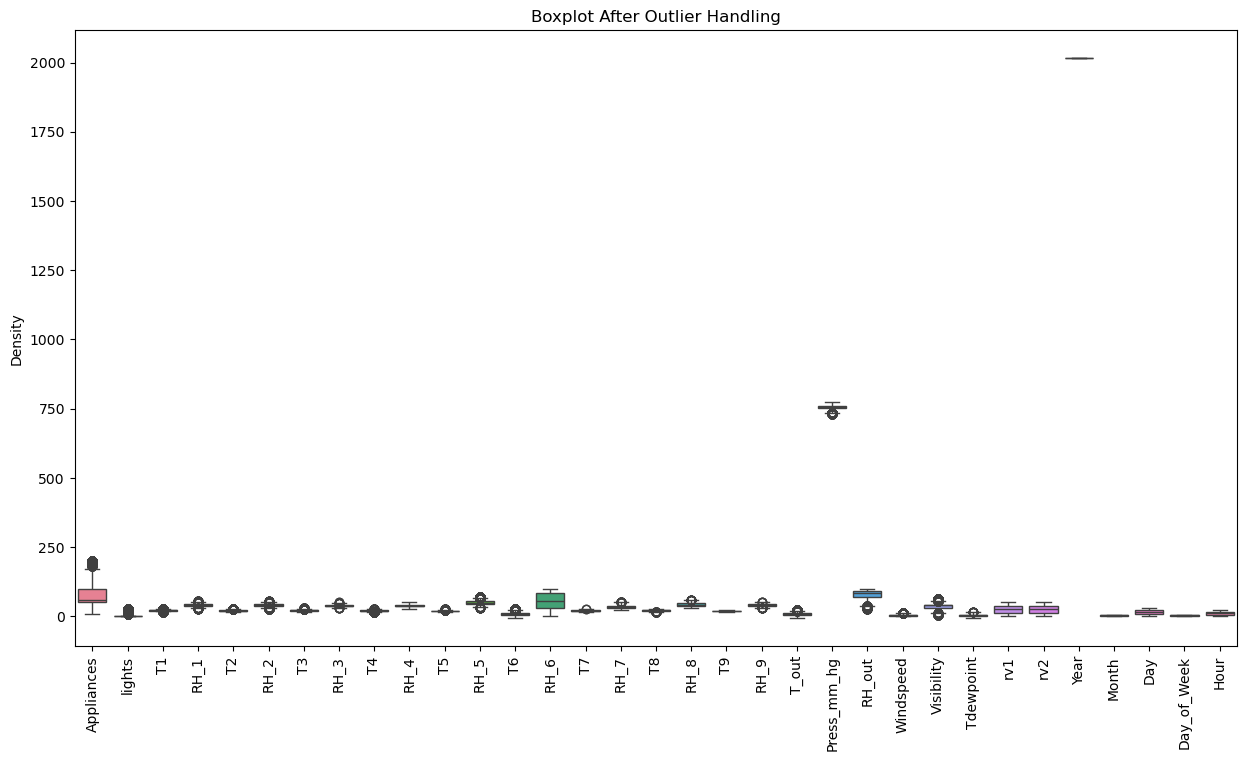

In [22]:
# Boxplot after removing outliers for all columns

plt.figure(figsize=(15,8))
sns.boxplot(data = df)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=90)
plt.ylabel('Density')
plt.show()

### Skewness:

Skewness: Skewness is a measure of the asymmetry of a dataset's distribution. It quantifies how much the data deviates from a symmetric, bell-shaped normal distribution.
Skewness = 0: Perfectly symmetric distribution.
Skewness > 0: Positively skewed (tail on the right).
Skewness < 0: Negatively skewed (tail on the left).
The further the skewness is from 0, the more pronounced the asymmetry.

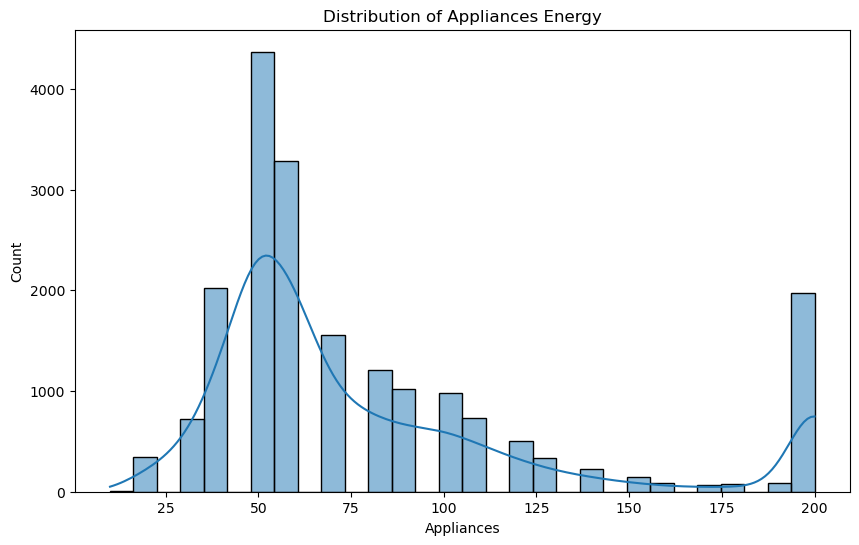

In [23]:
# Histogram Plot to visualize skewness in 'Appliances' column

plt.figure(figsize=(10,6))
sns.histplot(df['Appliances'], bins = 30, kde = True)
plt.title('Distribution of Appliances Energy')  
plt.show()

In [24]:
features = df.columns
print('Features Skewnes',df[features].skew())

Features Skewnes Appliances     1.400493
lights         1.825833
T1             0.122522
RH_1           0.441699
T2             0.811245
RH_2          -0.197292
T3             0.450546
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.556224
RH_5           1.047709
T6             0.589794
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.516593
Press_mm_hg   -0.417566
RH_out        -0.920304
Windspeed      0.840559
Visibility     0.450277
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
Year           0.000000
Month         -0.067969
Day           -0.088068
Day_of_Week    0.019354
Hour          -0.000673
dtype: float64


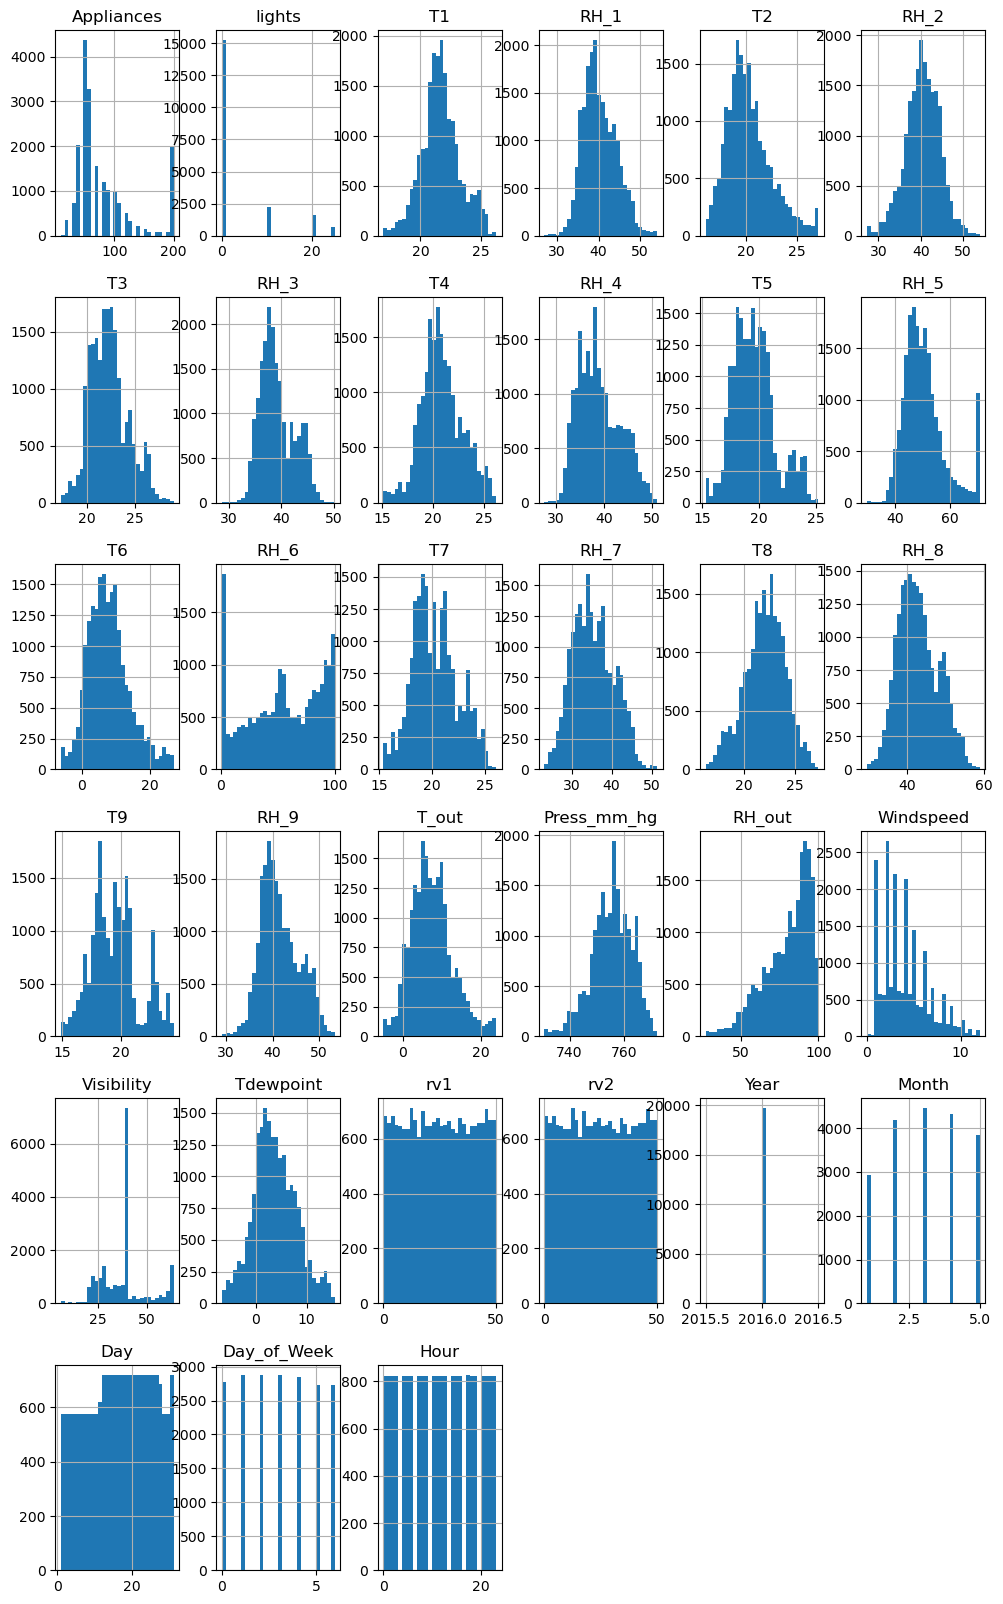

In [25]:
# Plot histograms before transforming features

df.hist(figsize=(12, 20), bins=30)
plt.show()

In [26]:
# Addressing Skewness
# Apply Yeo-Johnson transformation (works for both positive and negative skewness values)

pt = PowerTransformer(method='yeo-johnson')
df[features] = pt.fit_transform(df[features])
print(df[features].skew())

Appliances     0.001426
lights         1.302875
T1             0.002429
RH_1           0.003414
T2             0.019914
RH_2           0.012895
T3             0.003585
RH_3           0.027706
T4             0.000952
RH_4           0.032063
T5             0.003273
RH_5          -0.010801
T6             0.119744
RH_6          -0.425103
T7             0.001657
RH_7          -0.004479
T8            -0.016142
RH_8           0.003337
T9             0.007446
RH_9           0.005031
T_out          0.084331
Press_mm_hg   -0.017964
RH_out        -0.260249
Windspeed     -0.006449
Visibility     0.031828
Tdewpoint      0.030496
rv1           -0.244695
rv2           -0.244695
Year           0.000000
Month         -0.124767
Day           -0.226785
Day_of_Week   -0.185179
Hour          -0.241661
dtype: float64


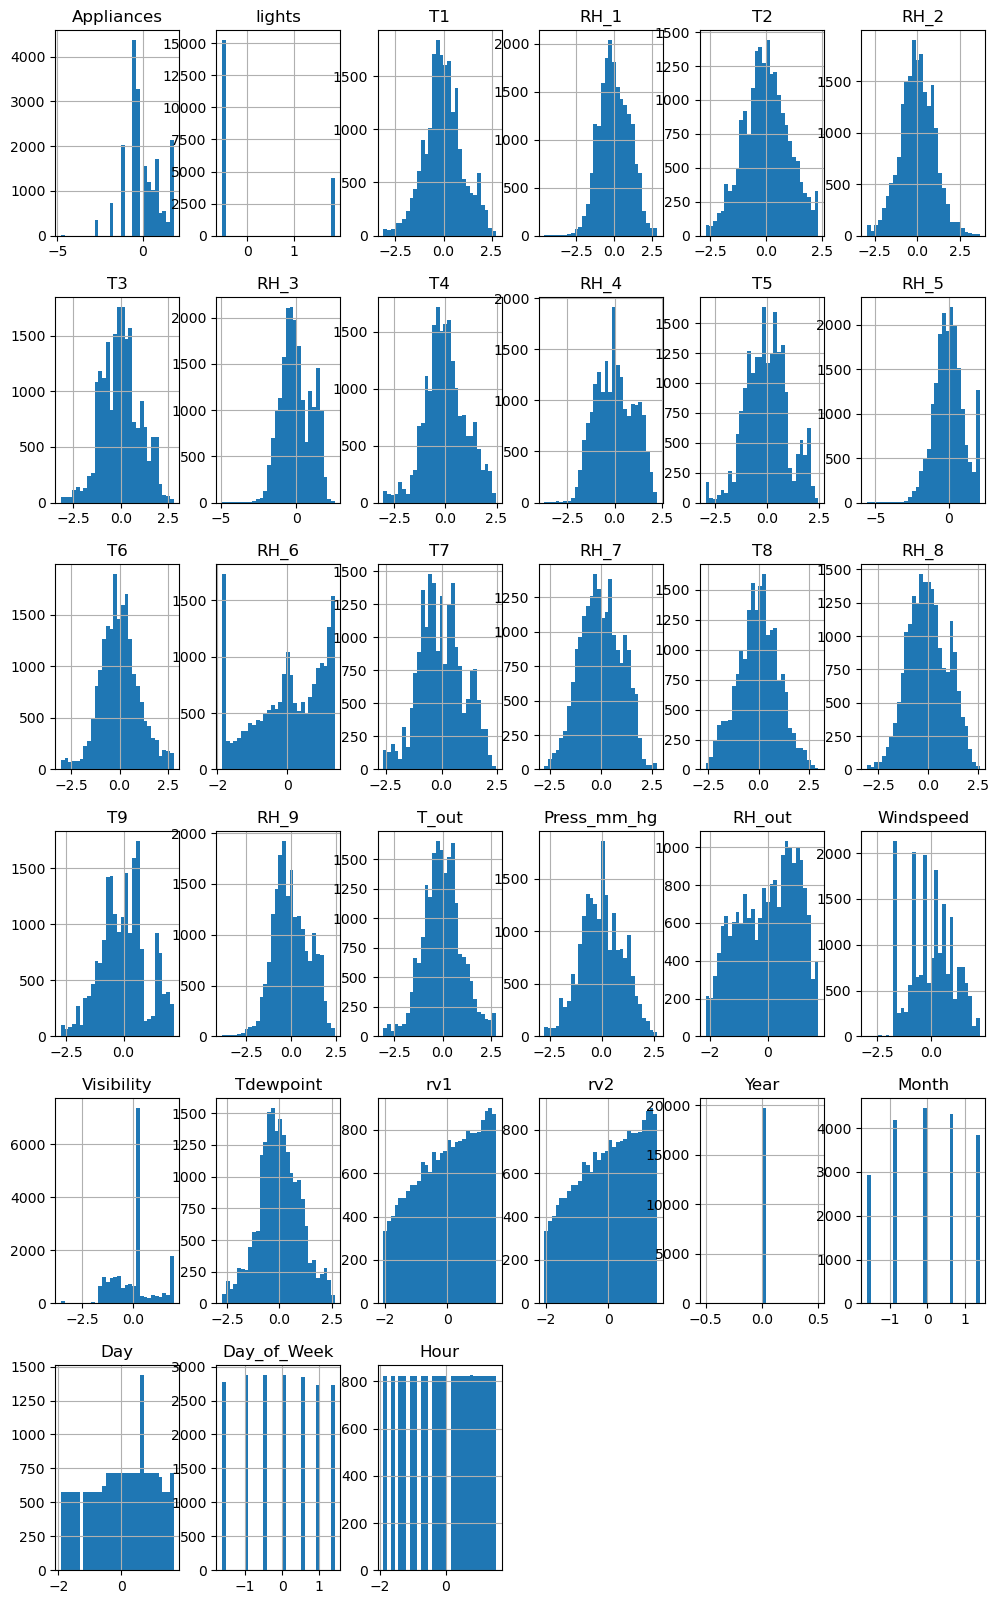

In [27]:
# Plot histograms after transformation of features

df.hist(figsize=(12, 20), bins=30)
plt.show()

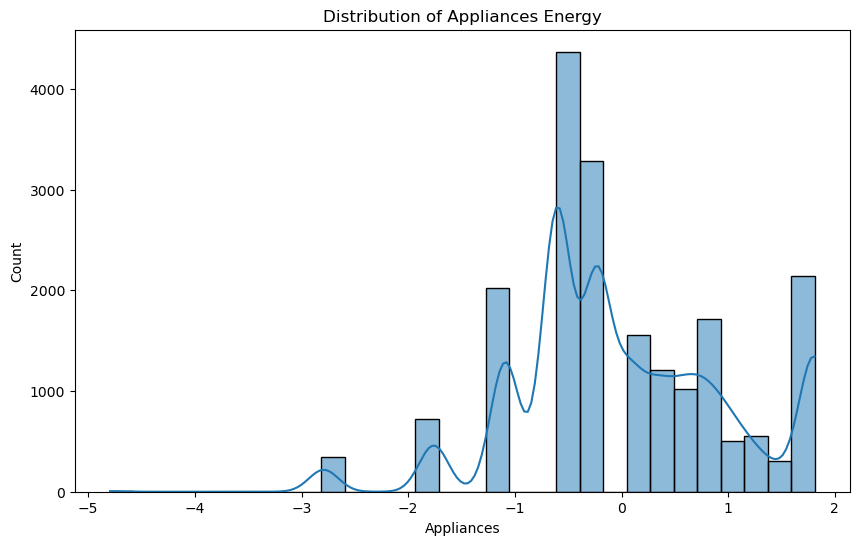

In [28]:
# Distribution of 'Appliances'

plt.figure(figsize=(10,6))
sns.histplot(df['Appliances'], bins = 30, kde = True)
plt.title('Distribution of Appliances Energy')  
plt.show()

In [29]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Year           0
Month          0
Day            0
Day_of_Week    0
Hour           0
dtype: int64

### Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is an essential step in the data analysis process that involves 
investigating and visualizing the dataset to understand its structure, identify patterns, detect outliers, 
and check assumptions. The goal of EDA is to summarize the main characteristics of the data and 
uncover relationships, trends, and potential issues before applying more advanced techniques.

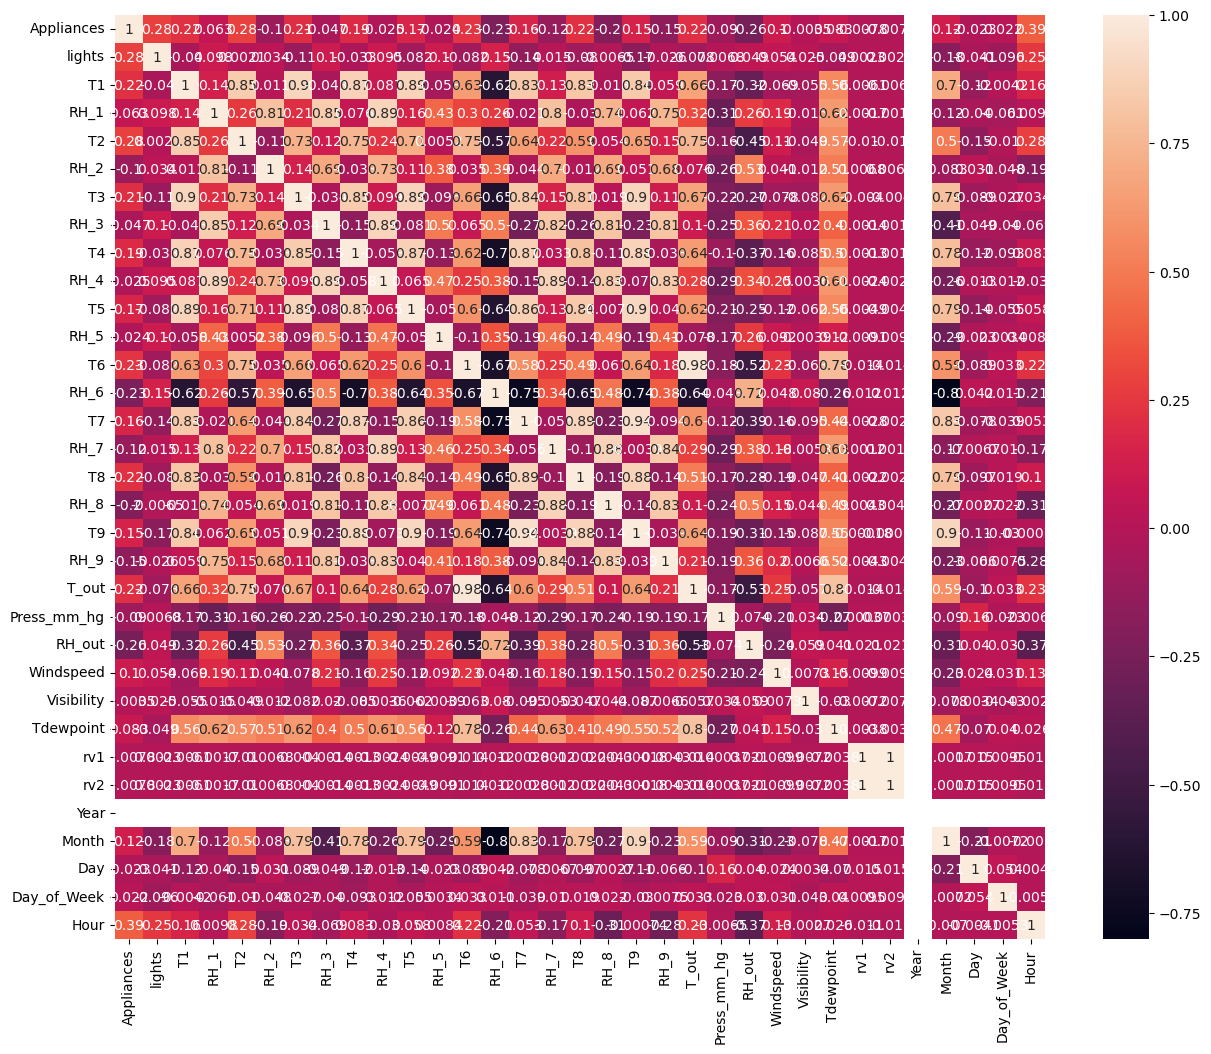

In [30]:
# Plot correlation after skewness transformation
# Columns from transformed data

plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

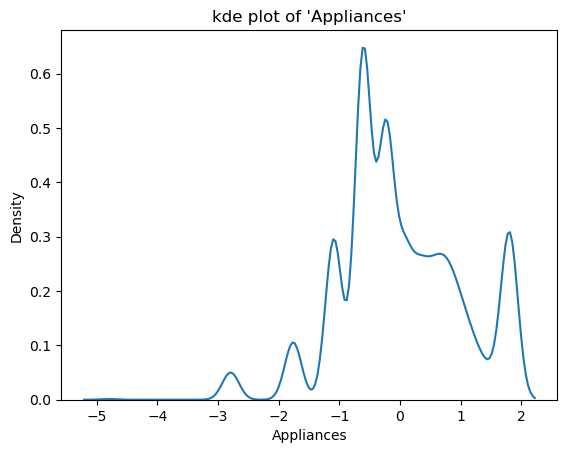

In [31]:
# KDE plot for Appliances distribution.

sns.kdeplot(df.Appliances)
plt.title("kde plot of 'Appliances'")
plt.show()

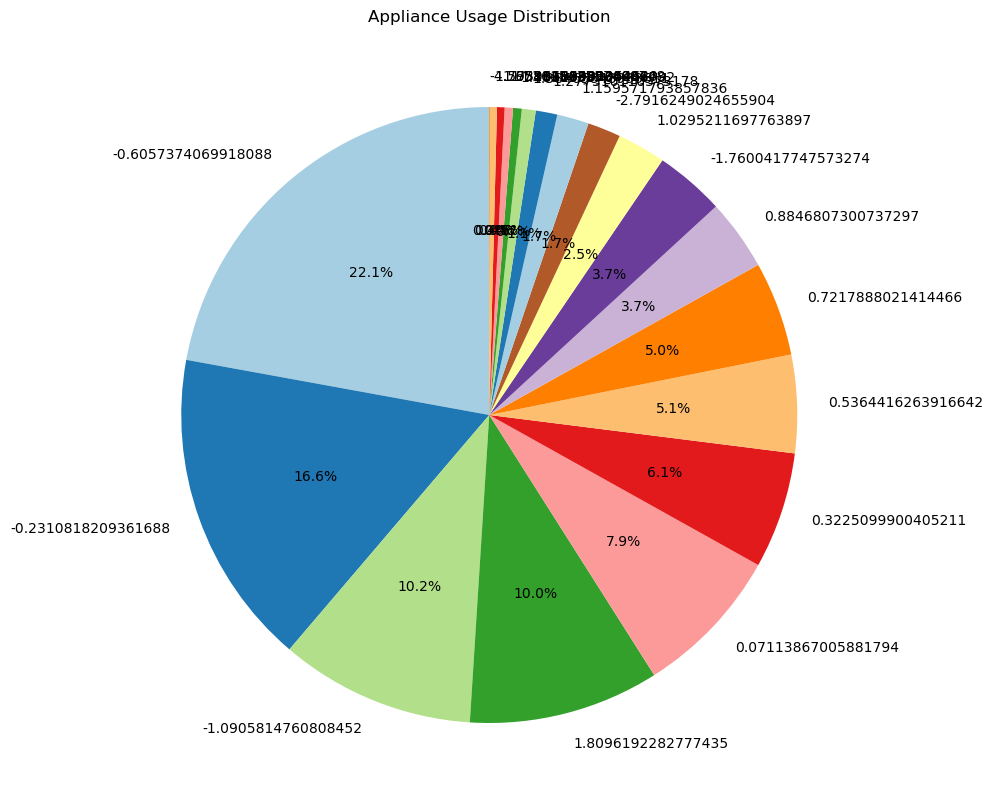

In [32]:
# Count values in each bin

usage_counts = df['Appliances'].value_counts()

# Create the pie chart

plt.figure(figsize=(13, 10))
plt.pie(
    usage_counts,
    labels=usage_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Appliance Usage Distribution')
plt.show()


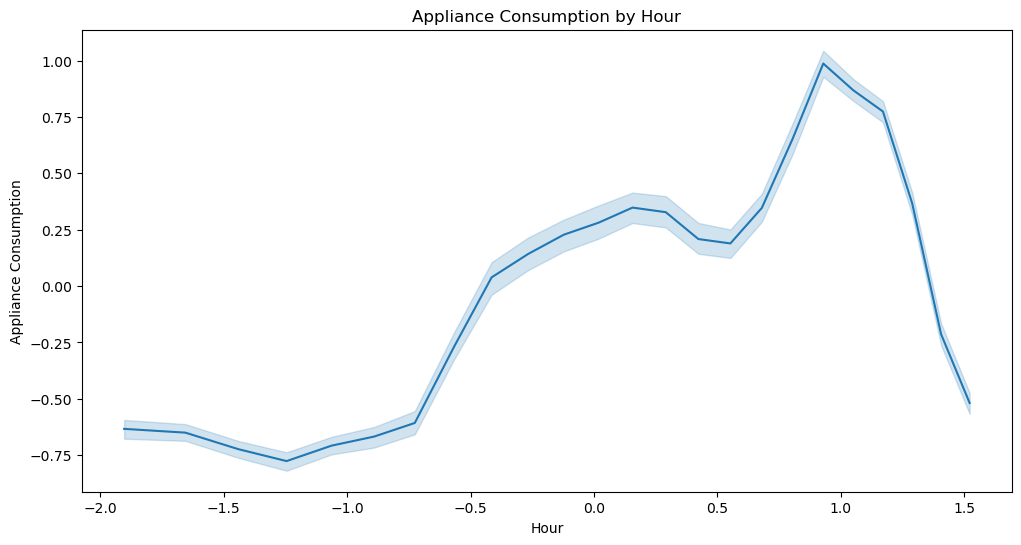

In [33]:
# Line plot for Appliances consumption in each hour

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Appliances', data=df)
plt.title('Appliance Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance Consumption')
plt.show()

### Feature Selection:

Feature Selection: Feature Selection is the process of identifying and selecting the most important features (or variables) 
for use in model building. This process helps improve the performance of machine learning models by 
reducing overfitting, improving accuracy, and reducing training time.

In [34]:
# Use Select K Best algorithm to identify relevant features
# For this, need to split X and y features

X = df.drop('Appliances', axis=1)
y = df['Appliances']

In [35]:
X.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Year', 'Month', 'Day', 'Day_of_Week', 'Hour'],
      dtype='object')

In [36]:
print(y)

0       -0.231082
1       -0.231082
2       -0.605737
3       -0.605737
4       -0.231082
           ...   
19730    0.721789
19731    0.536442
19732    1.809619
19733    1.809619
19734    1.809619
Name: Appliances, Length: 19735, dtype: float64


In [37]:
# Feature selection using SelectKBest, f_regression
# Applying F_Regression for feature selection

selector = SelectKBest(score_func=f_regression, k=20)   #Select top 15 features
X_kbest = selector.fit_transform(X, y)

SelectKBest: SelectKBest is a feature selection method provided by sklearn that selects the top k features based on a statistical test. This method can be used with various scoring functions to evaluate the importance of each feature in relation to the target variable.

f_regression: f_regression is a statistical test used in feature selection for regression problems. It measures the linear relationship between each feature and the target variable using the ANOVA F-statistic. The F-statistic is used to compare the variances between the groups and assess whether the feature is significantly related to the target variable.

In feature selection, f_regression helps determine which features have the strongest linear relationship with the target variable, which can then be used to select the most important features for a regression model.

In [38]:
# Get selected features name and score

selected_features_kbest = X.columns[selector.get_support()]  

# Get columns in 'selector' from whole X columns, get_support checks the availability of each feature in 'X' with the 'selector'(boolean) 

all_feature_scores = pd.DataFrame({'All Features':X.columns, 'Scores':selector.scores_}).sort_values(by='Scores', ascending = False)

print("Selected Features:",selected_features_kbest)
print(all_feature_scores)

Selected Features: Index(['lights', 'T1', 'T2', 'RH_2', 'T3', 'T4', 'T5', 'T6', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed',
       'Month', 'Hour'],
      dtype='object')
   All Features       Scores
31         Hour  3555.065730
0        lights  1669.696015
3            T2  1619.627151
21       RH_out  1384.907212
11           T6  1134.994499
12         RH_6  1077.304841
1            T1  1029.595453
15           T8   998.541455
19        T_out   965.180941
5            T3   919.077989
16         RH_8   846.282613
7            T4   739.227268
9            T5   585.330970
13           T7   547.051722
18         RH_9   472.498347
17           T9   455.280092
28        Month   291.440721
14         RH_7   284.435173
4          RH_2   217.711940
22    Windspeed   201.490999
20  Press_mm_hg   160.627717
24    Tdewpoint   136.859999
2          RH_1    78.220046
6          RH_3    43.400181
8          RH_4    12.795246
10         RH_5    11.373530
2

In [39]:
X[selected_features_kbest].head()

,lights,T1,T2,RH_2,T3,T4,T5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Month,Hour
0,1.872111,-1.124261,-0.443932,1.091144,-1.309974,-0.904209,-1.444806,-0.077296,0.930761,-1.532235,1.199002,-1.848646,1.131775,-1.280966,0.975989,-0.087800,0.877787,1.189940,-1.602228,0.80493
1,1.872111,-1.124261,-0.443932,1.073260,-1.309974,-0.904209,-1.444806,-0.108707,0.925305,-1.532235,1.187578,-1.848646,1.125707,-1.260487,0.982312,-0.109576,0.877787,1.100504,-1.602228,0.80493
2,1.872111,-1.124261,-0.443932,1.047896,-1.309974,-0.942102,-1.444806,-0.153326,0.899686,-1.532235,1.165832,-1.848646,1.103598,-1.301507,0.969659,-0.131409,0.877787,1.007287,-1.602228,0.80493
3,1.872111,-1.124261,-0.443932,1.038201,-1.309974,-0.961080,-1.444806,-0.174090,0.907226,-1.569996,1.141159,-1.891128,1.080309,-1.301507,0.948514,-0.153300,0.877787,0.909945,-1.602228,0.80493
4,1.872111,-1.124261,-0.443932,1.022346,-1.309974,-0.961080,-1.420410,-0.185041,0.948714,-1.532235,1.130810,-1.891128,1.080309,-1.301507,0.948514,-0.175249,0.877787,0.808087,-1.602228,0.80493


### Split Data into Training and Testing Sets:

Split Data: Splitting the data into training and testing sets is a crucial step in machine learning. It allows to train the model on one portion of the data (the training set) and evaluate its performance on another portion (the testing set). This helps ensure that the model generalizes well to new, unseen data and prevents overfitting.

In [40]:
# Split the selected data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_kbest], y, test_size = 0.2, random_state = 42)

In [41]:
# Output the shapes of the new training and testing sets

print("Training set shape (features):", X_train.shape) 
print("Testing set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Testing set shape (target):",y_test.shape)

Training set shape (features): (15788, 20)
Testing set shape (features): (3947, 20)
Training set shape (target): (15788,)
Testing set shape (target): (3947,)


### Feature Scaling:

Feature scaling is the process of standardizing or normalizing the range of independent 
variables (features) in a dataset. It's an important step in data preprocessing, especially when 
using machine learning algorithms that rely on the distance between data points or assume 
that the features have similar scales.

Scale numerical features if necessary to ensure uniform magnitude using techniques like
Min-Max scaling or Standardization

In [42]:
# Standard Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

The StandardScaler is a feature scaling technique provided by sklearn.preprocessing that standardizes the features by removing the mean and scaling them to unit variance (standard deviation of 1). This process is also known as Z-score normalization.

Standardization transforms the data to have a mean of 0 and a standard deviation of 1. The formula for standardization is: 𝑋scaled = (𝑋 − 𝜇) / 𝜎

where: X is the original value of the feature, μ is the mean of the feature, σ is the standard deviation of the feature.

In [43]:
# Convert back to DataFrame for easier handling

X_normalized_df = pd.DataFrame(X_train_scaled, columns=selected_features_kbest)
print(X_normalized_df.head())

     lights        T1        T2      RH_2        T3        T4        T5  \
0 -0.541787 -1.122936 -0.445081  1.168684 -0.943811 -0.848247 -1.195957   
1 -0.541787  2.329072  2.053669  0.370165  2.147054  1.811970  1.754585   
2 -0.541787  0.517725  0.680786  0.514649 -0.073688  0.578084 -0.181581   
3 -0.541787 -1.187851 -1.773692  0.093790 -0.820641 -1.216009 -0.675156   
4 -0.541787 -0.666592 -1.851888 -0.190737 -1.003283 -0.644480 -0.732903   

         T6      RH_6        T7      RH_7        T8      RH_8        T9  \
0  0.559483  1.321853 -1.358656  1.511397 -1.883895  1.307865 -1.195297   
1  2.501570 -1.863215  1.862781  1.675257  1.415305  1.319805  1.694271   
2 -0.158244  0.269116 -0.419010 -0.157382 -0.773900 -0.251565 -0.379307   
3 -0.800559  0.805953 -1.032769 -0.636261 -0.805905 -0.002922 -0.492725   
4 -1.511808  0.477488  0.258127 -0.305151  0.305566 -0.680119 -0.206743   

       RH_9     T_out    RH_out  Windspeed     Month      Hour  
0  1.604620  0.576052  0.265888  

### Build the ML Model:

In [44]:
# Model Building

models={
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regression' : DecisionTreeRegressor(),
    '3. Random Forest Regression' : RandomForestRegressor(),
    '4. Gradient Boosting Regression' : GradientBoostingRegressor(),
    '5. Support Vector Regression' : SVR(),
}

Linear Regression: It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. y=β
+ β

​X here:

Y is the dependent variable X is the independent variable β0 is the intercept β1 is the slope

Decision Tree Regression: It is a non-linear regression model that uses a decision tree structure to model the relationship between the features and the target variable. A decision tree is a flowchart-like tree structure where each internal node represents a decision based on a feature, and each leaf node represents the predicted value (the target variable).

Random Forest Regression: It is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. Unlike a single decision tree, which can be prone to overfitting, a random forest uses a collection of decision trees to make predictions and averages their outputs, resulting in more accurate and stable predictions.

Gradient Boosting Regression: It is an ensemble machine learning technique that builds a model by combining the predictions of several weaker models (typically decision trees) in a sequential manner. Unlike Random Forest, which builds trees independently, Gradient Boosting builds trees sequentially, where each tree tries to correct the errors made by the previous one. This technique is highly effective for regression tasks, especially when dealing with complex datasets.

Support Vector Regression: It is a type of Support Vector Machine (SVM) used for regression tasks. Unlike traditional regression models that aim to minimize the error in predictions, SVR tries to fit the best line (or hyperplane in higher dimensions) within a specified margin while allowing some errors (as long as they are within a certain threshold). It is particularly effective when the relationship between the features and the target variable is non-linear.

In [45]:
# Applying each model

results={} # use to store evaluation result

for model_name, model in models.items():
    
    # fit the model
    
    model.fit(X_train_scaled, y_train)
    
    # make the prediction
    
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    
    results[model_name] = {'MSE' : mse, 'MAE' : mae, 'R2' : r2, 'RMSE' : rmse}

MSE: Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

MAE: The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

R2 Score: The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

RMSE: The Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

### Model Evaluation:

In [46]:
results_df = pd.DataFrame(results).T
print(results_df)

                                      MSE       MAE        R2      RMSE
1. Linear Regression             0.703392  0.628432  0.310521  0.838685
2. Decision Tree Regression      0.572526  0.477843  0.438799  0.756654
3. Random Forest Regression      0.290414  0.384186  0.715331  0.538900
4. Gradient Boosting Regression  0.522618  0.529422  0.487719  0.722924
5. Support Vector Regression     0.497768  0.498436  0.512077  0.705527


Model evaluation: It is the process of assessing the performance of a machine learning model using various 
metrics and techniques. The goal is to determine how well the model generalizes to unseen data and whether 
it can make accurate predictions. Model evaluation is critical to ensure that the model is not overfitting 
or underfitting the training data and is capable of making reliable predictions on new data.

##### Best Model

In [47]:
# Print results.

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: R2_Score = {metrics['R2']:.4f}")

Model Performance:
1. Linear Regression: R2_Score = 0.3105
2. Decision Tree Regression: R2_Score = 0.4388
3. Random Forest Regression: R2_Score = 0.7153
4. Gradient Boosting Regression: R2_Score = 0.4877
5. Support Vector Regression: R2_Score = 0.5121


In [48]:
# Finding the best model among these models.

best_model = results_df['R2'].idxmax()
print("The best regression model is:",best_model)

The best regression model is: 3. Random Forest Regression


### Hyperparameter Tuning:

In [50]:
# Optimize model performance by tuning hyperparameters.
# Hyperparameter tuning for Random Forest Regression.
# Define the parameter grid for Grid Search.

param_grid = {
    'n_estimators': [50, 100],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf' : [1, 2]
}

Hyperparameter tuning: It is the process of finding the best set of hyperparameters for a machine learning 
model to improve its performance. Hyperparameters are parameters that are set before the learning process 
begins and are not updated during training (unlike model parameters). The goal of hyperparameter tuning 
is to identify the optimal combination of hyperparameters that leads to the best model performance.

In [ ]:
# GridSearchCV algorithm for hyperparameter tuning

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs= -1)

Grid Search: It is a hyperparameter tuning technique used to exhaustively search through a specified 
set of hyperparameters for a machine learning model. The goal is to find the best combination of 
hyperparameters that gives the best model performance. Grid search performs a cross-validated search 
over a grid of hyperparameters, testing all possible combinations.

In [52]:
# Fit the Grid Search to the Data

grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters : {best_params}")
print(f"Best Score : {best_score}")

Best Parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score : -0.3000152335850757


In [53]:
# Evaluate the best model
# Train the best model from Grid Search with the entire training data

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data

y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test RMSE : {test_rmse}")
print(f"Test R2 : {test_r2}")

Test MSE : 0.28164629460648666
Test MAE : 0.37859497369723655
Test RMSE : 0.5307035845050292
Test R2 : 0.7239244668126543


### Build Pipeline:

In [55]:
# Create the pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                 # Scale the features
    ('model', RandomForestRegressor())            # Random Forest Regressor
])
# Train the pipeline

pipeline.fit(X_train, y_train)
# Predict on test data

y_pred = pipeline.predict(X_test)

Pipeline: A Pipeline in machine learning is a way to streamline and automate the workflow of a 
machine learning project. It helps organize and manage different steps in the machine learning process, 
such as data preprocessing, feature engineering, model training, and evaluation. A pipeline ensures that 
all steps are performed in the correct order and that the workflow is repeatable and consistent.

In [57]:
# Saving pipeline model

joblib.dump(pipeline,'Appliances_Energy_Pipeline_RF.joblib')

['Appliances_Energy_Pipeline_RF.joblib']

#### Test the model with Unseen data:

In [60]:
# Create unseen data randomly from selected features

unseen_random_rows = X[selected_features_kbest].sample(n=10, random_state=42)

In [61]:
unseen_random_rows

,lights,T1,T2,RH_2,T3,T4,T5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Month,Hour
8980,-0.54212,-0.482304,-1.358362,-0.342657,-1.003986,-0.516315,-0.479715,-1.104198,0.340270,0.667122,-0.285308,0.504139,-0.570405,-0.019464,-0.565925,-1.055348,0.525357,-0.613456,-0.053298,-1.655033
2754,1.82133,0.144639,0.581767,1.242818,-0.246285,-0.130260,-1.081489,-0.849387,1.288257,-1.709150,0.799238,-0.750634,0.907129,-1.754184,0.689053,-0.854645,0.682080,-0.244122,-1.602228,1.170100
9132,-0.54212,-0.167020,-1.449075,-0.005141,-0.228581,-0.250825,0.104575,-1.418030,-0.049153,0.300311,-1.695606,-0.008574,-0.595800,0.031158,-0.766557,-1.422476,0.061480,-0.825416,-0.053298,-1.245224
14359,-0.54212,-0.167020,1.515411,-1.363550,-0.037078,0.763874,0.122954,0.569780,-1.442940,-0.048377,-0.979685,-0.465009,-0.926694,0.469312,-0.692670,0.322336,-0.797317,0.645825,0.679568,-0.122301
8875,-0.54212,-1.076650,-2.382333,-0.105476,-1.179756,-0.770530,-0.937133,-1.530418,0.557811,0.113505,-0.204934,-0.008574,-0.603524,-0.168583,-0.133866,-1.600034,1.012970,0.212336,-0.053298,-0.414860
10239,1.82133,0.520128,0.407920,0.009837,0.093528,0.195926,-0.121317,0.178320,-0.552934,-0.267185,-0.582300,0.485003,-0.968666,0.229688,-0.496811,0.087538,-0.287203,-0.003797,-0.053298,1.050076
8348,1.82133,-1.451209,-2.020766,-0.161597,-1.309974,-0.216058,-1.283251,-0.033093,-0.430890,-1.110589,-0.723387,-0.907080,-0.793545,-0.999721,-1.192068,-0.094016,-1.153372,0.701261,-0.053298,0.679570
15847,-0.54212,0.212730,0.275805,-0.037547,0.985062,-0.295626,0.159512,0.574332,-1.774626,-0.218102,-0.869811,0.354332,-1.051093,0.049619,-0.922381,0.470110,-1.015343,0.909945,0.679568,0.928390
13166,-0.54212,0.144639,-0.277233,1.075246,0.673815,0.579689,0.770027,-0.214138,0.038940,0.667122,0.164665,0.306358,0.302372,0.715056,0.672846,0.096674,0.556244,-0.420787,0.679568,-1.245224
7801,1.86476,-0.988152,-1.379681,-0.342657,-1.003986,-1.375167,-0.341444,-0.691494,0.595348,-0.883094,-1.075354,-0.420227,-1.481602,-0.692056,-1.579829,-0.757567,0.525357,-0.244122,-0.053298,1.288564


In [62]:
# Save the unseen data as a csv file.

joblib.dump(unseen_random_rows, 'Appliances_Energy_Unseen_Data.csv')

['Appliances_Energy_Unseen_Data.csv']

In [63]:
# Load The saved Pipeline and Unseen data.

loaded_pipeline = joblib.load('Appliances_Energy_Pipeline_RF.joblib')
loaded_unseen_data = joblib.load('Appliances_Energy_Unseen_Data.csv')

In [64]:
# Prediction using pipeline.

predictions = loaded_pipeline.predict(loaded_unseen_data)

In [65]:
# Store the unseen_random_rows to predicted_unseen_data to add predictions.

predicted_unseen_data = unseen_random_rows  

In [66]:
# Add a column in unseen_random_rows to store the predicted values.

predicted_unseen_data['Appliances_Energy_Predictions'] = predictions
predicted_unseen_data

,lights,T1,T2,RH_2,T3,T4,T5,T6,RH_6,T7,...,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Month,Hour,Appliances_Energy_Predictions
8980,-0.54212,-0.482304,-1.358362,-0.342657,-1.003986,-0.516315,-0.479715,-1.104198,0.340270,0.667122,...,0.504139,-0.570405,-0.019464,-0.565925,-1.055348,0.525357,-0.613456,-0.053298,-1.655033,-0.519498
2754,1.82133,0.144639,0.581767,1.242818,-0.246285,-0.130260,-1.081489,-0.849387,1.288257,-1.709150,...,-0.750634,0.907129,-1.754184,0.689053,-0.854645,0.682080,-0.244122,-1.602228,1.170100,0.667909
9132,-0.54212,-0.167020,-1.449075,-0.005141,-0.228581,-0.250825,0.104575,-1.418030,-0.049153,0.300311,...,-0.008574,-0.595800,0.031158,-0.766557,-1.422476,0.061480,-0.825416,-0.053298,-1.245224,-0.920337
14359,-0.54212,-0.167020,1.515411,-1.363550,-0.037078,0.763874,0.122954,0.569780,-1.442940,-0.048377,...,-0.465009,-0.926694,0.469312,-0.692670,0.322336,-0.797317,0.645825,0.679568,-0.122301,-0.237163
8875,-0.54212,-1.076650,-2.382333,-0.105476,-1.179756,-0.770530,-0.937133,-1.530418,0.557811,0.113505,...,-0.008574,-0.603524,-0.168583,-0.133866,-1.600034,1.012970,0.212336,-0.053298,-0.414860,0.006689
10239,1.82133,0.520128,0.407920,0.009837,0.093528,0.195926,-0.121317,0.178320,-0.552934,-0.267185,...,0.485003,-0.968666,0.229688,-0.496811,0.087538,-0.287203,-0.003797,-0.053298,1.050076,1.055226
8348,1.82133,-1.451209,-2.020766,-0.161597,-1.309974,-0.216058,-1.283251,-0.033093,-0.430890,-1.110589,...,-0.907080,-0.793545,-0.999721,-1.192068,-0.094016,-1.153372,0.701261,-0.053298,0.679570,0.719723
15847,-0.54212,0.212730,0.275805,-0.037547,0.985062,-0.295626,0.159512,0.574332,-1.774626,-0.218102,...,0.354332,-1.051093,0.049619,-0.922381,0.470110,-1.015343,0.909945,0.679568,0.928390,0.387609
13166,-0.54212,0.144639,-0.277233,1.075246,0.673815,0.579689,0.770027,-0.214138,0.038940,0.667122,...,0.306358,0.302372,0.715056,0.672846,0.096674,0.556244,-0.420787,0.679568,-1.245224,-0.521524
7801,1.86476,-0.988152,-1.379681,-0.342657,-1.003986,-1.375167,-0.341444,-0.691494,0.595348,-0.883094,...,-0.420227,-1.481602,-0.692056,-1.579829,-0.757567,0.525357,-0.244122,-0.053298,1.288564,0.845577


In [68]:
print(predicted_unseen_data['Appliances_Energy_Predictions'])

8980    -0.519498
2754     0.667909
9132    -0.920337
14359   -0.237163
8875     0.006689
10239    1.055226
8348     0.719723
15847    0.387609
13166   -0.521524
7801     0.845577
Name: Appliances_Energy_Predictions, dtype: float64


In [69]:
# Test with bottom 10 data samples

new_unseen_data = X_train.tail(10)

In [70]:
new_unseen_data

,lights,T1,T2,RH_2,T3,T4,T5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Month,Hour
11363,1.86476,0.026628,0.500365,-0.253611,0.198351,0.323150,0.373397,1.032061,-1.329336,0.346414,-0.415245,1.239286,-0.546144,0.567253,-0.557914,0.633360,-1.085722,-0.003797,-0.053298,0.422553
14423,1.82133,0.520128,0.529165,-1.857923,0.623346,1.048301,0.885780,0.406199,-1.773309,0.855305,-1.263533,0.394458,-1.149198,0.379340,-1.727560,0.563673,-1.511333,0.279824,0.679568,1.170100
4426,-0.54212,-1.124261,-0.426928,0.170431,-0.879547,-1.059757,-0.418271,-0.465582,1.177045,-0.133650,0.955412,-0.219443,1.009882,-0.278772,0.517542,-0.621946,1.151986,0.212336,-0.810644,-0.122301
16850,-0.54212,2.297314,2.091541,-2.344424,1.437998,1.729764,1.275699,2.656887,-1.866512,1.454950,-0.589474,1.470027,-1.340250,1.343358,-0.791364,2.757733,-2.110137,0.070682,1.393498,0.804930
6265,-0.54212,-0.730824,-1.027406,0.112542,-0.481086,-0.450822,-0.541870,-1.858083,0.855443,-0.567387,0.719075,-0.907080,0.597639,-0.548924,0.664727,-1.902038,1.331224,-1.473349,-0.810644,-0.890646
11284,-0.54212,0.063950,-0.337504,0.645723,0.440837,0.340794,0.373397,0.314934,-0.114268,0.396856,-0.198887,1.112111,0.539727,0.500573,-0.169036,0.449540,-0.347661,1.100504,-0.053298,-1.655033
11964,-0.54212,0.452794,0.868336,0.382657,0.296523,0.239509,0.159512,1.554199,-1.064495,0.622639,0.926503,1.131017,0.810270,0.469312,0.708887,1.748353,-1.068385,-0.825416,0.679568,1.050076
5390,-0.54212,-0.865609,-1.057063,-0.722490,-1.118622,-1.322190,-0.541870,-1.882357,0.892425,-0.825350,-1.066408,-0.435175,-0.171903,-0.773356,-0.450248,-1.772208,0.404071,0.070682,-0.810644,-1.245224
860,-0.54212,0.082592,0.197760,-1.300541,-0.481086,0.147376,-0.830694,-1.103914,1.281192,0.751038,-0.891670,0.306358,-0.627801,-0.434093,0.055486,-0.989760,-1.153372,-1.326686,-1.602228,0.679570
15795,-0.54212,-0.208846,-0.071152,-0.487810,0.296523,-0.546626,-0.121317,0.528727,-0.769323,-0.516660,-0.271746,-0.420227,0.204363,0.031158,0.006611,-0.078484,0.271900,-1.631170,0.679568,-0.266567


In [71]:
y_train_actual = y_train.tail(10)

In [72]:
y_train_actual

11363    0.536442
14423    1.029521
4426    -0.605737
16850    0.536442
6265    -1.090581
11284   -0.231082
11964    1.029521
5390    -1.760042
860      0.322510
15795    1.159572
Name: Appliances, dtype: float64

In [73]:
# Save the unseen data as a csv file.

joblib.dump(new_unseen_data, 'New_Appliances_Energy_Unseen_Data.csv')

['New_Appliances_Energy_Unseen_Data.csv']

In [74]:
# Load The saved Pipeline and Unseen data.

new_loaded_pipeline = joblib.load('Appliances_Energy_Pipeline_RF.joblib')
new_loaded_unseen_data = joblib.load('New_Appliances_Energy_Unseen_Data.csv')

In [75]:
# Prediction using pipeline.

new_predictions = new_loaded_pipeline.predict(new_loaded_unseen_data)

In [76]:
# Store the new_unseen_data to new_predicted_unseen_data to add predictions.

new_predicted_unseen_data = new_unseen_data  

In [77]:
new_predicted_unseen_data['Appliances_Energy_Predictions'] = new_predictions
new_predicted_unseen_data

,lights,T1,T2,RH_2,T3,T4,T5,T6,RH_6,T7,...,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Month,Hour,Appliances_Energy_Predictions
11363,1.86476,0.026628,0.500365,-0.253611,0.198351,0.323150,0.373397,1.032061,-1.329336,0.346414,...,1.239286,-0.546144,0.567253,-0.557914,0.633360,-1.085722,-0.003797,-0.053298,0.422553,0.482597
14423,1.82133,0.520128,0.529165,-1.857923,0.623346,1.048301,0.885780,0.406199,-1.773309,0.855305,...,0.394458,-1.149198,0.379340,-1.727560,0.563673,-1.511333,0.279824,0.679568,1.170100,0.998075
4426,-0.54212,-1.124261,-0.426928,0.170431,-0.879547,-1.059757,-0.418271,-0.465582,1.177045,-0.133650,...,-0.219443,1.009882,-0.278772,0.517542,-0.621946,1.151986,0.212336,-0.810644,-0.122301,-0.143719
16850,-0.54212,2.297314,2.091541,-2.344424,1.437998,1.729764,1.275699,2.656887,-1.866512,1.454950,...,1.470027,-1.340250,1.343358,-0.791364,2.757733,-2.110137,0.070682,1.393498,0.804930,0.441284
6265,-0.54212,-0.730824,-1.027406,0.112542,-0.481086,-0.450822,-0.541870,-1.858083,0.855443,-0.567387,...,-0.907080,0.597639,-0.548924,0.664727,-1.902038,1.331224,-1.473349,-0.810644,-0.890646,-0.978269
11284,-0.54212,0.063950,-0.337504,0.645723,0.440837,0.340794,0.373397,0.314934,-0.114268,0.396856,...,1.112111,0.539727,0.500573,-0.169036,0.449540,-0.347661,1.100504,-0.053298,-1.655033,-0.260205
11964,-0.54212,0.452794,0.868336,0.382657,0.296523,0.239509,0.159512,1.554199,-1.064495,0.622639,...,1.131017,0.810270,0.469312,0.708887,1.748353,-1.068385,-0.825416,0.679568,1.050076,0.949669
5390,-0.54212,-0.865609,-1.057063,-0.722490,-1.118622,-1.322190,-0.541870,-1.882357,0.892425,-0.825350,...,-0.435175,-0.171903,-0.773356,-0.450248,-1.772208,0.404071,0.070682,-0.810644,-1.245224,-1.478294
860,-0.54212,0.082592,0.197760,-1.300541,-0.481086,0.147376,-0.830694,-1.103914,1.281192,0.751038,...,0.306358,-0.627801,-0.434093,0.055486,-0.989760,-1.153372,-1.326686,-1.602228,0.679570,0.288036
15795,-0.54212,-0.208846,-0.071152,-0.487810,0.296523,-0.546626,-0.121317,0.528727,-0.769323,-0.516660,...,-0.420227,0.204363,0.031158,0.006611,-0.078484,0.271900,-1.631170,0.679568,-0.266567,1.318826


In [78]:
actual_vs_pred = pd.DataFrame([y_train_actual, new_predicted_unseen_data['Appliances_Energy_Predictions']]).T

In [79]:
print(actual_vs_pred)

       Appliances  Appliances_Energy_Predictions
11363    0.536442                       0.482597
14423    1.029521                       0.998075
4426    -0.605737                      -0.143719
16850    0.536442                       0.441284
6265    -1.090581                      -0.978269
11284   -0.231082                      -0.260205
11964    1.029521                       0.949669
5390    -1.760042                      -1.478294
860      0.322510                       0.288036
15795    1.159572                       1.318826


#### Evaluate the Unseen data:

In [80]:
# Evaluate the model with unseen data.

unseen_mse = mean_squared_error(y_train_actual, new_predicted_unseen_data['Appliances_Energy_Predictions'])
unseen_mae = mean_absolute_error(y_train_actual, new_predicted_unseen_data['Appliances_Energy_Predictions'])
unseen_rmse = np.sqrt(unseen_mse)
unseen_r2 = r2_score(y_train_actual, new_predicted_unseen_data['Appliances_Energy_Predictions'])

print("The scores of predicted values of unseen data are:\n")
print(f"Unseen MSE : {unseen_mse}")
print(f"Unseen MAE : {unseen_mae}")
print(f"Unseen RMSE : {unseen_rmse}")
print(f"Unseen R2 : {unseen_r2}")

The scores of predicted values of unseen data are:

Unseen MSE : 0.035217468136375704
Unseen MAE : 0.1339230327417442
Unseen RMSE : 0.18766317735873414
Unseen R2 : 0.9598229375567304


### Conclusion:

The project successfully developed a robust and reliable predictive model for estimating energy consumption, leveraging the Random Forest Regressor algorithm. The model demonstrated high accuracy in its predictions, indicating its potential usefulness in real-world applications. However, there is room for further enhancement by experimenting with more advanced machine learning techniques, optimizing hyperparameters, or incorporating additional data sources. The insights derived from this model can play a significant role in improving energy management practices, supporting better planning, reducing waste, and promoting more efficient use of resources.